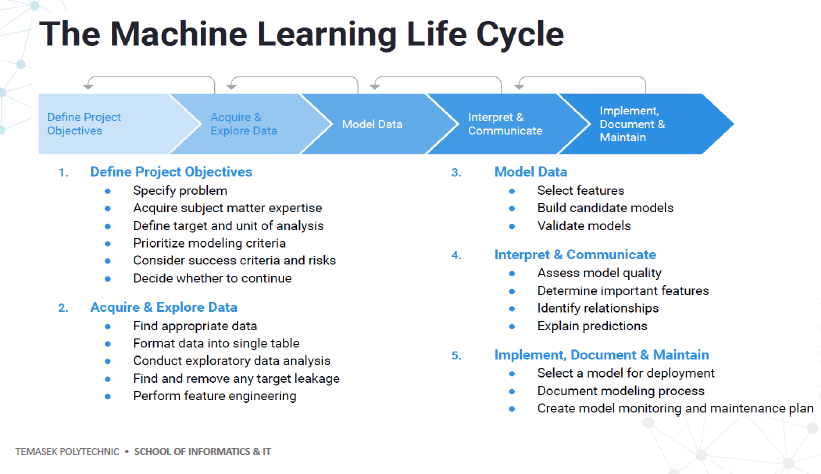

### Overview of tasks to be done:
##### 1. Define Project Objectives

- 1.1: [Specify the problem](#specify-the-problem)
    
- 1.2: [Define my target and features to use](#define-target-features)
    
- 1.3: [TPEZM Statement](#tpezm-statement)
    
- 1.4: [What to achieve in the model (success and risk) (Task in TPEZM)](#what-i-plan-to-achieve-in-this-model)
    
    
##### 2. Conquer and analyse the data
    
- 2.1: [Load dataset](#loading-of-dataset)
    
- 2.2: [Conduct EDA and cleaning of data](#conduct-eda-cleaning)
    
- 2.3: [Find and remove target leakage and noise(Noise in TPEZM)](#remove-noise-tl)
    
      
##### 3. Modelling of Data
    
- 3.1: [Selecting features to use](#select-features)
    
- 3.2: [Building models and comparing them (Model in TPEZM)](#build-model)
    
- 3.3: [Validating of model and scoring them using metrics (Performance in TPEZM)](#hyper-parameter)
    
- 3.4: [Doing hyper-parameter tuning to achieve best score](#hyperparameter-tuning)

#### 4. Interpretation of model
    
- 4.1: [Accesing model quality then do Feature Engineering](#access-model-quality)
    
- 4.2: [Explanation of Model Performance](#explain-model-performance)
    
- 4.3: [Conclusion](#conclusion)

<a id="define-project-objective"></a>
### Define Project Objective

<a id="specify-the-problem"></a>
#### 1.1: Specify the problem
An US bank would like to improve its financial performance with regards to approval of new loans. There are probably too many people that defaulted on the loan and might cost the bank money in certain scenarios. but not every defaulters is a loss.

<a id="define-target-features"></a>
#### 1.2: Define my target and features to use

For the target, I would be using loan_status and as for the features, we will wait till we do the feature engineering and importance to see which feature we will use.

<a id="tpezm-statement"></a>
#### 1.3: TPEZM Statement

Task: Predict if a person would default on a loan (loan_status-> Charged off / Fully Paid Off) based on his records

Performance: Precision,Recall, F1-Score, MCC

Experience: Historical records of person's loan record (installment amount, term, grade score, loan amount etc.)

Noise: Dataset imbalanced, lots of missing data (valuable info lost), super high income person loaning a small amount, target & data leakage

Model: RandomForestClassifier

<a id="what-i-plan-to-achieve-in-this-model"></a>
#### 1.4: What I plan to achieve in this model

- Find out which record (or feature) of a person's bank habit make them more likely to be charged off (default) on the loan
- Predict as close as possible to actual value for the model and decide whether or not to approve the loans for future loaners with their given record
- Risk is that, might be hard because I don't know which features gives me the best result


#### Importing of Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2: Conquer and analyse the dataset

<a id="loading-of-dataset"></a>
### 2.1: Loading of Dataset

In [2]:
df = pd.read_csv('LendingLoanClub.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', str)

randomstate = 2002019

<a id="conduct-eda-cleaning"></a>
### 2.2: Conduct EDA and cleaning of data

#### Justify the Noise

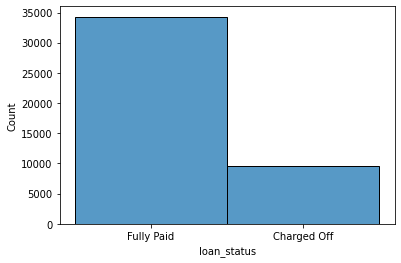

Fully Paid     34289
Charged Off     9614
Name: loan_status, dtype: int64

Fully Paid     0.7810172425574562
Charged Off   0.21898275744254378
Name: loan_status, dtype: float64


In [3]:
sns.histplot(x='loan_status',data=df) #hist plot
plt.show()
print(df['loan_status'].value_counts())
print()
print(df['loan_status'].value_counts(normalize=True)) #normalize the value count to show percentages

Loan status imbalanced, almost 1:4 ratio

#### Justify the outliers

count             43903.0
mean    76992.24416418013
std     90467.30750653974
min                   0.0
25%               45000.0
50%               65000.0
75%               91000.0
max            10999200.0
Name: annual_inc, dtype: float64


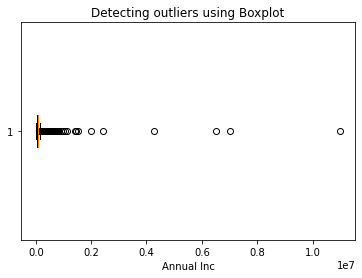

In [4]:
print(df['annual_inc'].describe()) #to let me see how it is distributed in terms of mean,max etc

plt.boxplot(df['annual_inc'], vert=False) #boxplot for annual inc to find outliers
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Annual Inc')
plt.show()

Takeaway: We can see that there are obvious outliers for Annual Inc, which is a noise to the model

#### Justify the missing values

<AxesSubplot:>

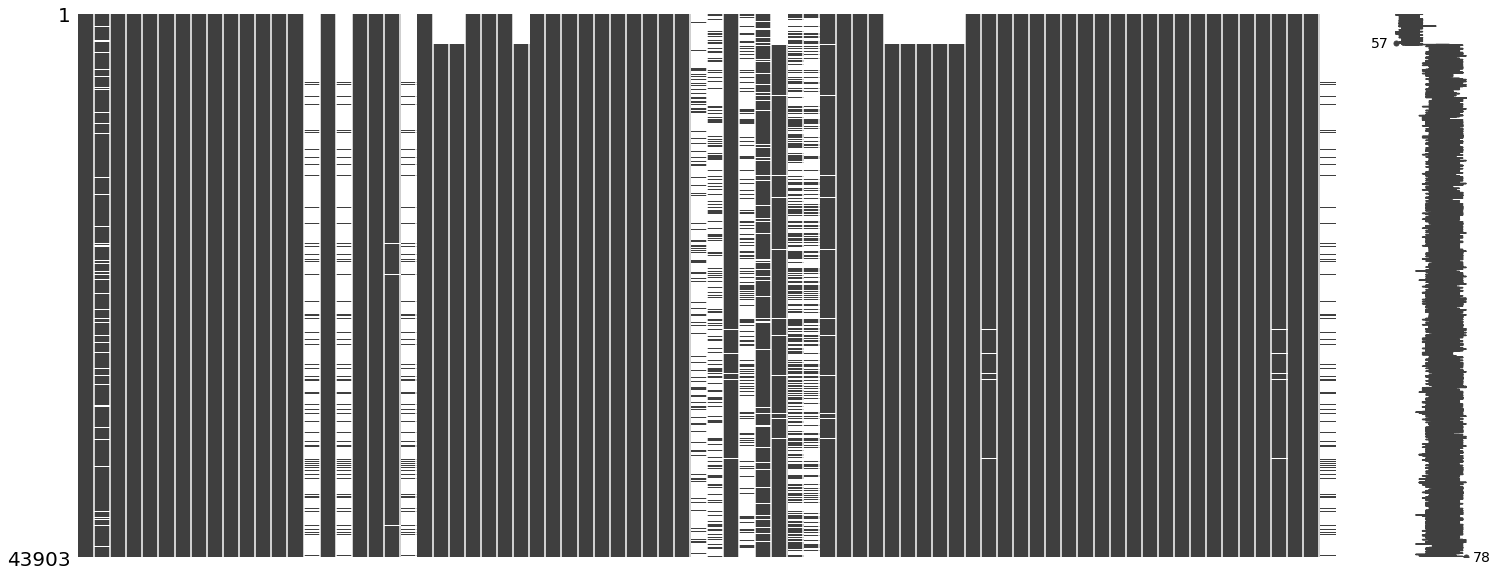

In [5]:
import missingno as msno
msno.matrix(df) #to view whether the missing data is missing at random etc

In [6]:
rows = [] #declare a list to append later
for i in df.columns:
    if df[i].isnull().sum()!=0: #only want columns with >=1 values missing, not interested in columns with no missing value
        rows.append([i,df[i].isnull().sum(),(df[i].isnull().sum()/df.shape[0])*100]) #i want the column name, missing val count and percentage expression
        
missing_values = pd.DataFrame(rows, columns=["Column Name", "No. of Missing Values","Percentage Missing"])
missing_values = missing_values.sort_values('No. of Missing Values',ascending=False)
missing_values

Column Name  No. of Missing Values   Percentage Missing
2        verification_status_joint                  39095     89.0485843791996
26                 revol_bal_joint                  39094    89.04630663052639
4                        dti_joint                  39094    89.04630663052639
1                 annual_inc_joint                  39094    89.04630663052639
8           mths_since_last_record                  37025      84.333644625652
11        mths_since_recent_bc_dlq                  34017    77.48217661663213
9      mths_since_last_major_derog                  32336    73.65328109696377
15  mths_since_recent_revol_delinq                  29598    67.41680522971095
14          mths_since_last_delinq                  22604    51.48623100927043
12           mths_since_recent_inq                   4549   10.361478714438649
13              mths_since_rcnt_il                   3733    8.502835797098149
0                        emp_title                   3258    7.420905177322734
7                      open_acc_6m                   2495    5.682982939662438
6                     inq_last_12m                   2495    5.682982939662438
5                           inq_fi                   2495    5.682982939662438
17                     open_il_12m                   2495    5.682982939662438
18                     open_il_24m                   2495    5.682982939662438
19                     open_rv_12m                   2495    5.682982939662438
20                     open_rv_24m                   2495    5.682982939662438
21                      max_bal_bc                   2495    5.682982939662438
16              mo_sin_old_il_acct                   1291    2.940573537115915
25                percent_bc_gt_75                    643   1.4645923968749288
23                  bc_open_to_buy                    641    1.460036899528506
10            mths_since_recent_bc                    598    1.362093706580416
3                              dti                     60  0.13666492039268388
24                  pct_tl_nvr_dlq                      5 0.011388743366056988
22                     avg_cur_bal                      4 0.009110994692845592

There were many missing values, this is valuable information lost.

##### Doing Data Quality Checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43903 entries, 0 to 43902
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43903 non-null  int64  
 1   emp_title                       40645 non-null  object 
 2   application_type                43903 non-null  object 
 3   home_ownership                  43903 non-null  object 
 4   loan_status                     43903 non-null  object 
 5   loan_amnt                       43903 non-null  int64  
 6   int_rate                        43903 non-null  object 
 7   installment*term                43903 non-null  float64
 8   term                            43903 non-null  int64  
 9   installment                     43903 non-null  float64
 10  grade                           43903 non-null  object 
 11  issue_d                         43903 non-null  object 
 12  last_pymnt_d                    

In [8]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

43903 rows and 78 columns


In [9]:
df.describe()

id          loan_amnt   installment*term  \
count            43903.0            43903.0            43903.0   
mean  112295819.90016627 14736.439992711204 19354.747356672666   
std   26217407.091817115  9537.260821465858 13534.698298722866   
min            1227221.0             1000.0             273.96   
25%          113846406.0             7200.0            8741.88   
50%          117280507.0            12000.0           15902.28   
75%          124152093.5            20000.0           27076.32   
max          126417318.0            40000.0            79114.2   

                    term        installment        annual_inc  \
count            43903.0            43903.0           43903.0   
mean    42.7845933079744  440.3426421884609 76992.24416418013   
std   10.807506349625118 282.08431582523076 90467.30750653974   
min                 36.0               7.61               0.0   
25%                 36.0             234.58           45000.0   
50%                 36.0             365.31           65000.0   
75%                 60.0  585.9649999999999           91000.0   
max                 60.0            1717.63        10999200.0   

        annual_inc_joint                dti          dti_joint  \
count             4809.0            43843.0             4809.0   
mean  117087.07241630276 19.390316128002187 19.372551466001244   
std    57238.70382341665 21.185847568545125  7.728927373386075   
min              23000.0                0.0               0.28   
25%              80068.0              11.78               13.8   
50%             106000.0              17.85              19.03   
75%             140192.0              24.67               24.7   
max            1058000.0              999.0              39.97   

              delinq_2yrs             inq_fi       inq_last_12m  \
count             43903.0            41408.0            41408.0   
mean  0.31362321481447736 1.0570179675425038  2.112466190108192   
std     0.933860356524041  1.501984105527576 2.3782206914870225   
min                   0.0                0.0                0.0   
25%                   0.0                0.0                0.0   
50%                   0.0                1.0                1.0   
75%                   0.0                2.0                3.0   
max                  36.0               20.0               35.0   

          inq_last_6mths           mort_acc           open_acc  \
count            43903.0            43903.0            43903.0   
mean  0.5432430585609184 1.4125458396920483 11.432749470423433   
std    0.829692100248931 1.7620251361868713  5.706085298201785   
min                  0.0                0.0                0.0   
25%                  0.0                0.0                7.0   
50%                  0.0                1.0               10.0   
75%                  1.0                2.0               14.0   
max                  6.0               18.0               74.0   

             open_acc_6m  acc_open_past_24mths             pub_rec  \
count            41408.0               43903.0             43903.0   
mean  0.9392870942812983     4.594606291141836 0.18124046192743093   
std   1.1271407397182869    3.1810034276108845  0.5401907625661616   
min                  0.0                   0.0                 0.0   
25%                  0.0                   2.0                 0.0   
50%                  1.0                   4.0                 0.0   
75%                  1.0                   6.0                 0.0   
max                 10.0                  33.0                44.0   

               total_acc  out_prncp  out_prncp_inv        total_pymnt  \
count            43903.0    43903.0        43903.0            43903.0   
mean  23.219506639637384        0.0            0.0 15353.866768818692   
std   11.923164501376615        0.0            0.0 11371.878404837764   
min                  2.0        0.0            0.0             255.56   
25%                 15.0        0.0            0.0 

In [10]:
df.head()

id                   emp_title application_type home_ownership  \
0  1227221                       FedEx       Individual       MORTGAGE   
1  1244543  Newland Medical Associates       Individual       MORTGAGE   
2  1372036         Spirit Aero Systems       Individual       MORTGAGE   
3  1545038     MidAtlantic Farm Credit       Individual       MORTGAGE   
4  3005981                       Damco       Individual           RENT   

  loan_status  loan_amnt int_rate  installment*term  term  installment grade  \
0  Fully Paid      24000   15.80%           34865.4    60       581.09     C   
1  Fully Paid      35000   21.00%           56812.2    60       946.87     E   
2  Fully Paid      16800   11.55%           22194.0    60        369.9     B   
3  Fully Paid      25200   12.12%           33725.4    60       562.09     B   
4  Fully Paid      12000   16.29%           17620.2    60       293.67     C   

    issue_d last_pymnt_d  annual_inc  annual_inc_joint verification_status  \
0  1/6/2013     1/6/2018     80000.0               NaN            Verified   
1  1/5/2013     1/5/2018    102800.0               NaN            Verified   
2  1/7/2013     1/7/2018     45000.0               NaN            Verified   
3  1/5/2013     1/5/2018     60000.0               NaN            Verified   
4  1/4/2013     1/5/2018    115000.0               NaN     Source Verified   

  verification_status_joint pymnt_plan             purpose   dti  dti_joint  \
0                       NaN          n  debt_consolidation 19.02        NaN   
1                       NaN          n  debt_consolidation  22.0        NaN   
2                       NaN          n         credit_card 21.01        NaN   
3                       NaN          n         credit_card 12.34        NaN   
4                       NaN          n         credit_card 20.76        NaN   

   delinq_2yrs  inq_fi  inq_last_12m  inq_last_6mths  mort_acc  open_acc  \
0            0     NaN           NaN               1         3        11   
1            0     NaN           NaN               1         1         9   
2            0     NaN           NaN               0         3        14   
3            0     NaN           NaN               0         2        16   
4            0     NaN           NaN               1         0        13   

   open_acc_6m  acc_open_past_24mths  pub_rec  total_acc initial_list_status  \
0          NaN                     4        0         21                   f   
1          NaN                     5        0         24                   f   
2          NaN                     6        0         22                   w   
3          NaN                     4        0         33                   w   
4          NaN                     5        0         29                   w   

   out_prncp  out_prncp_inv  total_pymnt  total_rec_prncp  total_rec_int  \
0          0              0  34865.04213          24000.0       10865.04   
1          0              0  56823.41136          35000.0       21823.41   
2          0              0  22193.80999          16800.0        5393.81   
3          0              0  33725.35128          25200.0        8525.35   
4          0              0  17621.41291          12000.0        5621.41   

   total_rec_late_fee  mths_since_last_record  mths_since_last_major_derog  \
0                 0.0                     NaN                          NaN   
1                 0.0                     NaN                          NaN   
2                 0.0                     NaN                         67.0   
3                 0.0                     NaN                          NaN   
4                 0.0                     NaN                          NaN   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                  49.0                       NaN                    3.0   
1                   2.0                       NaN                    6.0   
2                  19.0                       

In [11]:
df.duplicated().sum() #no duplicated thankfully

0

### Conducting EDA

#### Loan Amount VS Loan Status

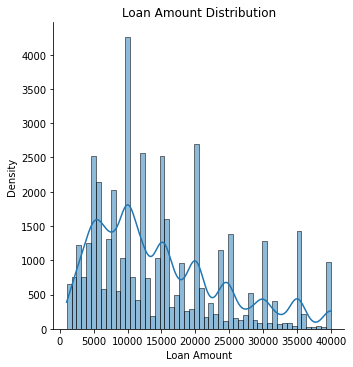

In [12]:
sns.displot(df['loan_amnt'],kde=True) #just want to see the distribution
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Density")

plt.show()

Loan amount is right skewed, suggesting that the mean is greater than the median.

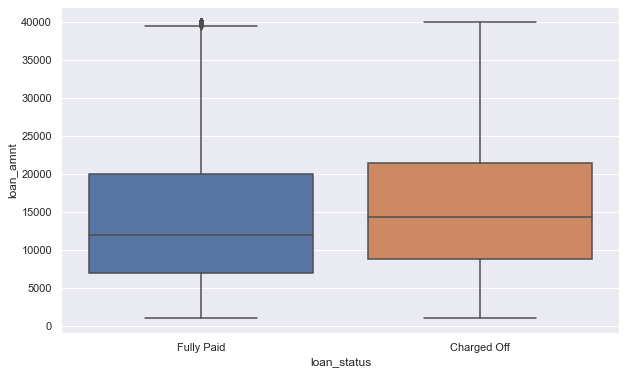

In [13]:
fig = plt.figure(figsize=(10,6))
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.show()

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

count               mean               std    min    25%  \
loan_status                                                              
Charged Off  9614.0 16016.002704389432 9687.598983478658 1000.0 8800.0   
Fully Paid  34289.0 14377.674327043658  9463.82044336952 1000.0 7000.0   

                50%      75%     max  
loan_status                           
Charged Off 14400.0 21418.75 40000.0  
Fully Paid  12000.0  20000.0 40000.0

Typically, those that were charged off had a higher average loan amount.

#### Grade VS Loan Status

C    14158
B    12682
A     8037
D     5769
E     2141
F      680
G      436
Name: grade, dtype: int64


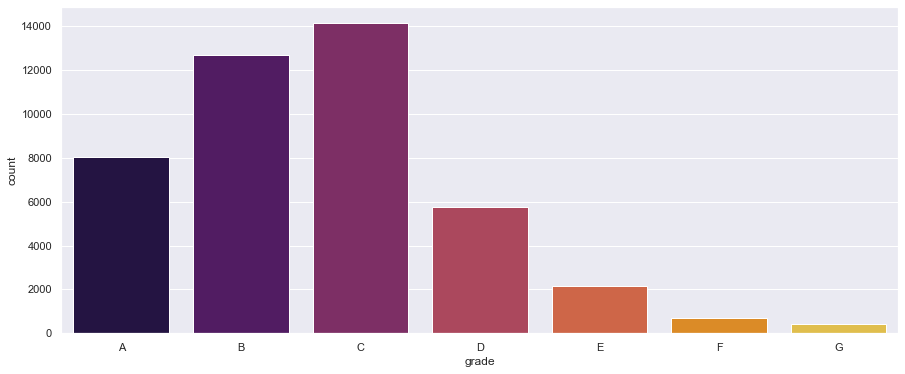

In [15]:
print(df.grade.value_counts())

sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(data = df, x='grade',palette='inferno',order=['A','B','C','D','E','F','G']) #to find out the distribution
plt.show()

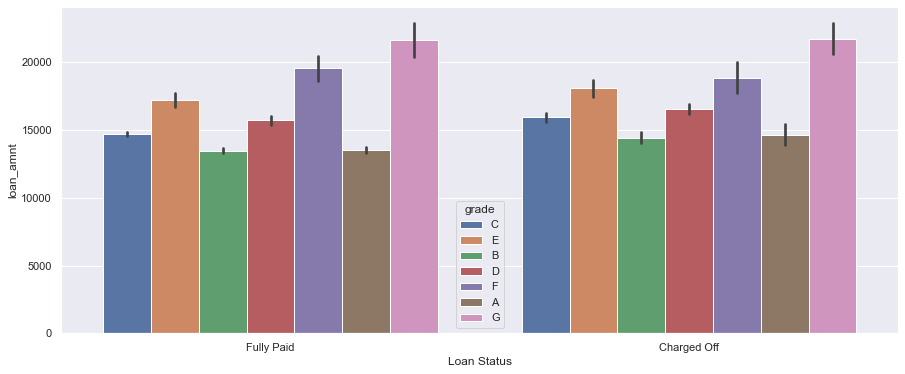

In [16]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='loan_status', y='loan_amnt',hue='grade', data=df)
plt.xlabel('Loan Status')
plt.show()

You can see here that Grades are probably ranked. Grade A had a lower loan amount and Grade G has the highest loan amount, this could be used for our predictor too.

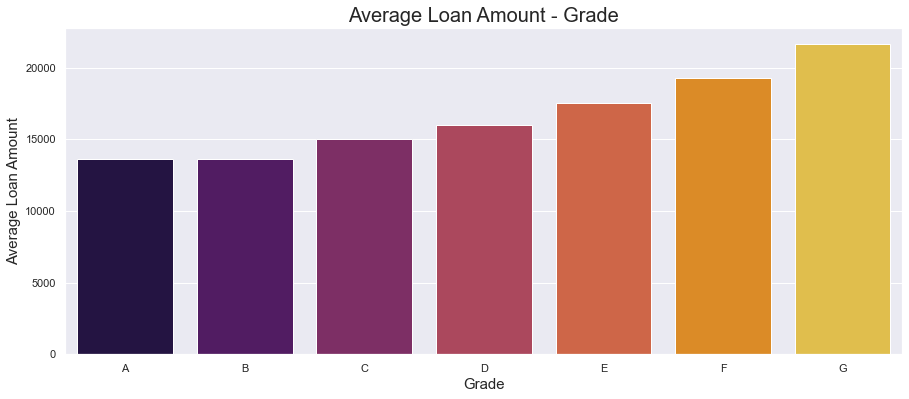

In [17]:
loan_grades = df.groupby("grade").mean().reset_index()

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='inferno',order=['A','B','C','D','E','F','G'])
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);
plt.show()

In [18]:
grade_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df['grade'] = df['grade'].map(grade_map)

In [19]:
from scipy.stats import spearmanr

coef, p = spearmanr(df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0), df['grade']) #mapping loan status for now
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.228
Samples are correlated (reject H0) p=0.000


Can see that grades is correlated to loan_status

#### Loan status vs Int Rate

In [20]:
df['int_rate'] = df['int_rate'].str[:-1].astype('float64') #to remove the % sign

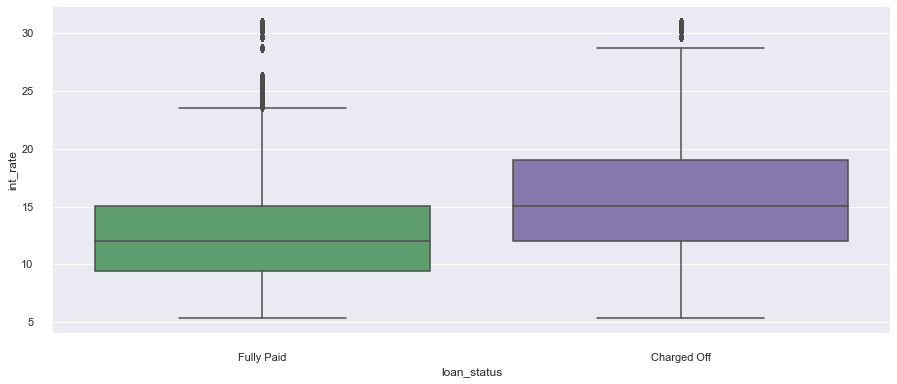

In [21]:
sns.boxplot(x="loan_status", y="int_rate", palette=["g", "m"],
            data=df)
sns.despine(offset=10, trim=True)
plt.show()

Takeaway: We can see that those that were charged off had a higher interest rate than those that fully paid. The high  interest rate could be the reason why they defaulted

#### Loan Status vs Installment Amount

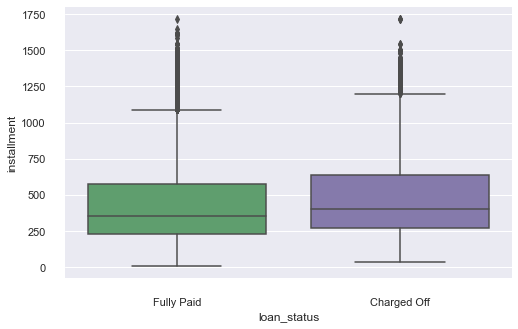

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="installment", palette=["g", "m"],
            data=df)
sns.despine(offset=10, trim=True)
plt.show()

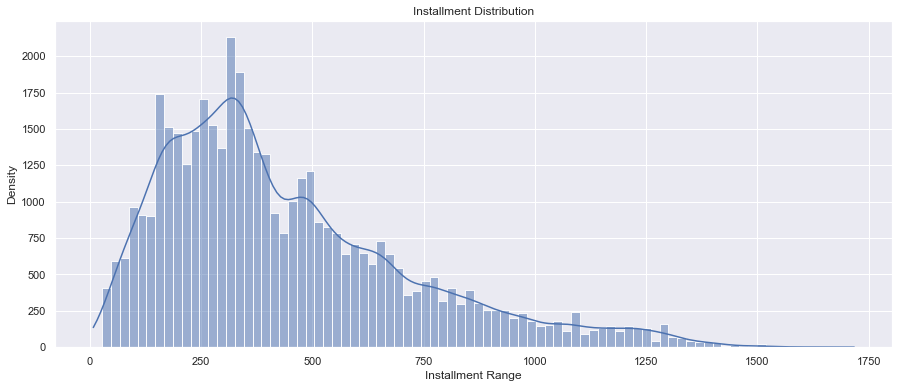

In [23]:
sns.histplot(df['installment'],kde=True)
plt.title("Installment Distribution")
plt.xlabel("Installment Range")
plt.ylabel("Density")

plt.show()

You can see that the installment is right skewed, suggesting that the mean is greater than the median.

In [24]:
df.groupby('loan_status')['installment'].describe()

count               mean                std   min    25%    50%  \
loan_status                                                                     
Charged Off  9614.0 477.64187851050553 284.66287606606215 32.01 266.89 402.14   
Fully Paid  34289.0  429.8846277231766  280.4722888941638  7.61  225.6 355.84   

               75%     max  
loan_status                 
Charged Off  640.1 1717.63  
Fully Paid  571.59 1714.54

Those that were charged off had a higher installment amount on  average

#### Loan Status vs Term

In [25]:
df.groupby('loan_status')['term'].value_counts()

loan_status  term
Charged Off  36       5893
             60       3721
Fully Paid   36      25599
             60       8690
Name: term, dtype: int64

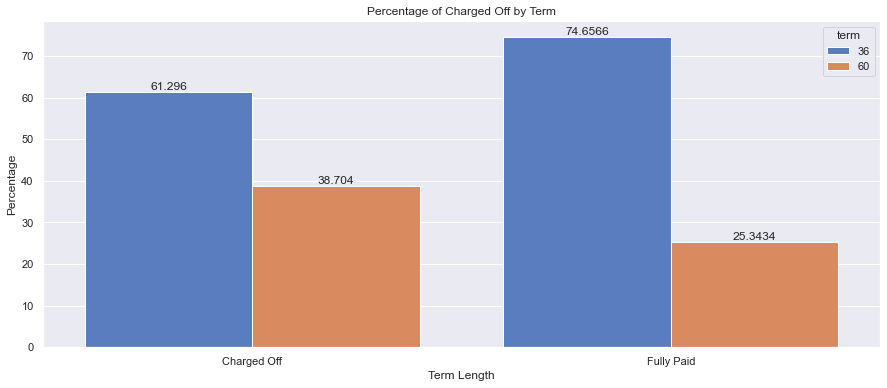

In [26]:
df_term = df.groupby('loan_status')['term'].value_counts(normalize=True).rename('PERCENTAGE').mul(100).sort_index().reset_index() #normalise the data

graph = sns.barplot(x='loan_status',y='PERCENTAGE',hue='term',data=df_term, palette="muted");

graph.bar_label(graph.containers[0]) #labelling
graph.bar_label(graph.containers[1]) #labelling

plt.title("Percentage of Charged Off by Term")
plt.xlabel('Term Length');
plt.ylabel('Percentage');
plt.show()

Takeaway: You can see that in the 36months term plan, there were more that fully paid than those charged off, this is probably good news right? However, in the 60months term plan, there were more that were charged off, this is bad news as it means a potential loss of money for the bank

#### loan_status vs pub_rec_bankruptcies 

In [27]:
df['pub_rec_bankruptcies'].value_counts()

0    37983
1     5794
2      110
3        8
4        5
6        2
5        1
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x >=1 else 0) 
#1 if they had records of bankruptcy, 0 if none, makes things easier

In [29]:
print(df['pub_rec_bankruptcies'].value_counts())
print()
print(df.groupby('loan_status')['pub_rec_bankruptcies'].value_counts())

0    37983
1     5920
Name: pub_rec_bankruptcies, dtype: int64

loan_status  pub_rec_bankruptcies
Charged Off  0                        8170
             1                        1444
Fully Paid   0                       29813
             1                        4476
Name: pub_rec_bankruptcies, dtype: int64


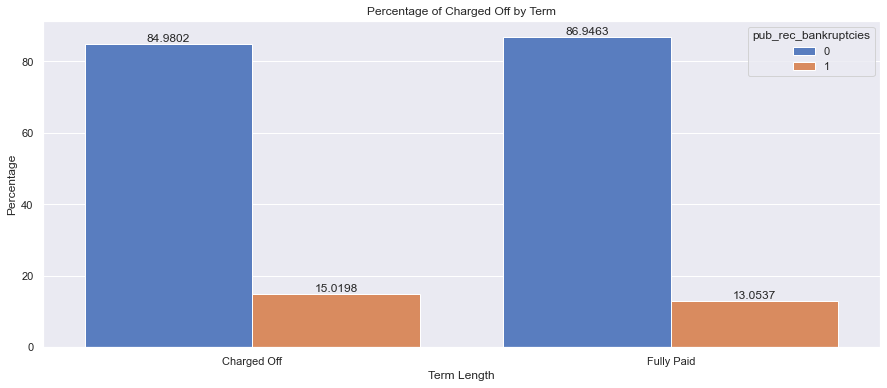

In [30]:
df_pub_rec_bankruptcies = df.groupby('loan_status')['pub_rec_bankruptcies'].value_counts(normalize=True).rename('PERCENTAGE').mul(100).sort_index().reset_index() #normalise the data

graph = sns.barplot(x='loan_status',y='PERCENTAGE',hue='pub_rec_bankruptcies',data=df_pub_rec_bankruptcies, palette="muted");

graph.bar_label(graph.containers[0]) #labelling
graph.bar_label(graph.containers[1]) #labelling

plt.title("Percentage of Charged Off by Term")
plt.xlabel('Term Length');
plt.ylabel('Percentage');
plt.show()

 Takeaway: You can see that those that had previous bankruptcy records had a higher chance of defaulting than paying for the loans

- Amount Requested
- Interest Rate
- Term (Loan Length)
- Debt/Income Ratio **
- 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
- Credit Lines Open
- Revolving Balance
- Inquiries in Last 6 Months
- Length of Employment

#### Loan status VS DTI

In [31]:
df['dti'].describe()

count              43843.0
mean    19.390316128002187
std     21.185847568545125
min                    0.0
25%                  11.78
50%                  17.85
75%                  24.67
max                  999.0
Name: dti, dtype: float64

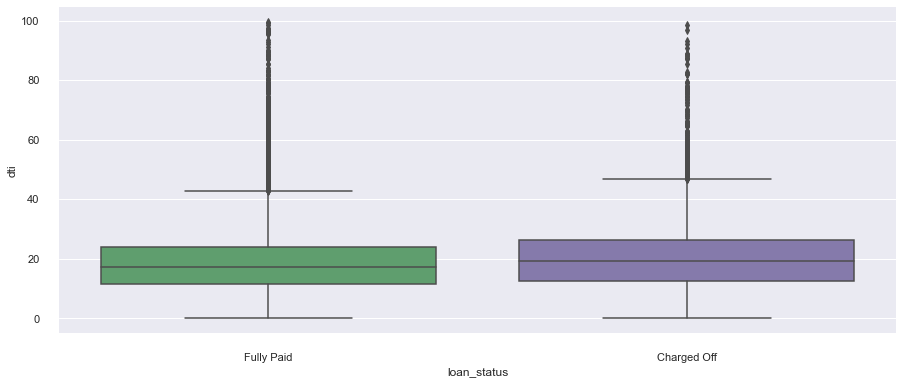

In [32]:
sns.boxplot(x="loan_status", y=df.loc[df['dti'].notnull() & (df['dti']<100), 'dti'], palette=["g", "m"],
            data=df) #there's missing values but i just want to see what the distribution is like
sns.despine(offset=10, trim=True)
plt.show()

Text(0.5, 1.0, 'Debt-to-income Ratio')

<Figure size 720x270 with 0 Axes>

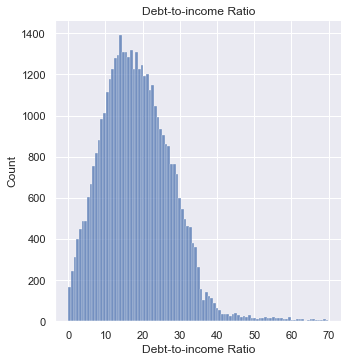

In [33]:
plt.figure(figsize=(8,3), dpi=90)
sns.displot(df.loc[df['dti'].notnull() & (df['dti']<70), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [34]:
df.groupby('loan_status')['dti'].describe()

count               mean              std  min     25%   50%  \
loan_status                                                                  
Charged Off  9601.0   21.0529330278096 24.9234962385019  0.0   12.76  19.4   
Fully Paid  34242.0 18.924140529174696 19.9885582884348  0.0 11.5425 17.44   

              75%   max  
loan_status              
Charged Off 26.41 999.0  
Fully Paid  24.15 999.0

Takeaway: Those that defaulted had a higher DTI amount than those who fully paid  off

#### Annual Inc vs Loan Status

In [35]:
df['annual_inc'].describe()

count             43903.0
mean    76992.24416418013
std     90467.30750653974
min                   0.0
25%               45000.0
50%               65000.0
75%               91000.0
max            10999200.0
Name: annual_inc, dtype: float64

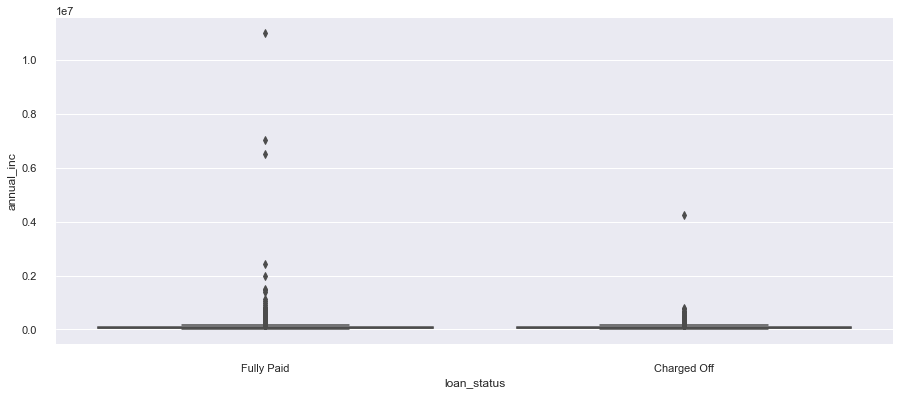

In [36]:
sns.boxplot(x="loan_status", y="annual_inc", palette=["g", "m"],
            data=df)
sns.despine(offset=10, trim=True)
plt.show()

In [37]:
df_annual_inc = df.loc[:, ['annual_inc']]
df_annual_inc = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())] #just want the -3 and +3 std of annual inc, beyond that i dont want

In [38]:
df_annual_inc['annual_inc'].describe()

count             43675.0
mean    74170.30217607328
std     42754.57485783764
min                   0.0
25%               45000.0
50%               65000.0
75%               90000.0
max              347000.0
Name: annual_inc, dtype: float64

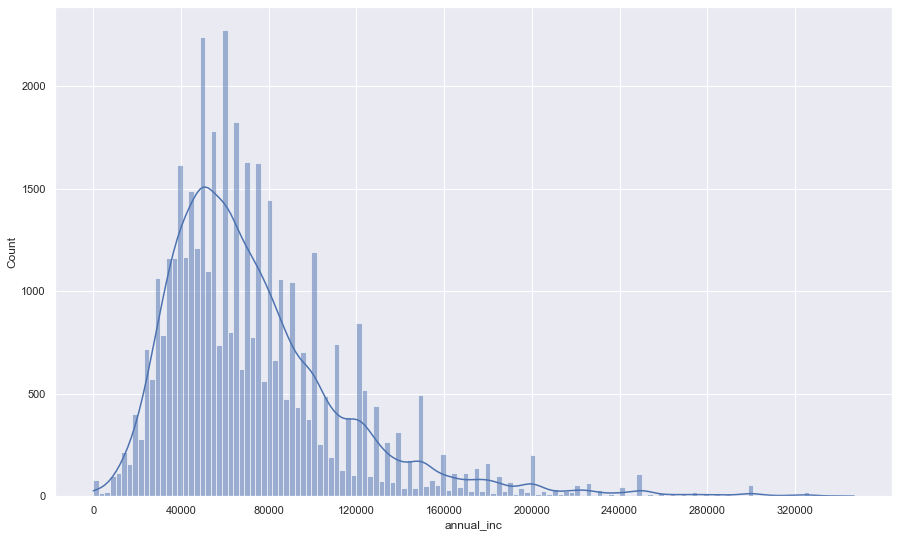

In [39]:
plt.figure(figsize=(15,9))
sns.histplot(df_annual_inc['annual_inc'],kde=True)
plt.xticks(np.arange(0, 347000, 40000))
plt.show()

Let's bin it in 10000 for simpler visualisation purposes.

In [40]:
bins = [x for x in range(0,380000,10000)]
labels = [x for x in range(0,37,1)]
df_annual_inc = df.loc[:, ['annual_inc','loan_status']]
df_annual_inc['annual_inc_binned'] = pd.cut(df_annual_inc['annual_inc'], bins=bins, labels=labels) #binning the annual income that is in 10,000

In [41]:
df_annual_inc.groupby('annual_inc_binned')['loan_status'].value_counts(normalize=True)

annual_inc_binned  loan_status
0                  Fully Paid     0.7058823529411765
                   Charged Off   0.29411764705882354
1                  Fully Paid     0.6609392898052692
                   Charged Off   0.33906071019473083
2                  Fully Paid     0.7369424323293938
                   Charged Off    0.2630575676706062
3                  Fully Paid     0.7459944456312754
                   Charged Off   0.25400555436872463
4                  Fully Paid     0.7741881204778731
                   Charged Off   0.22581187952212686
5                  Fully Paid     0.7736008091706001
                   Charged Off   0.22639919082939985
6                  Fully Paid      0.784037558685446
                   Charged Off     0.215962441314554
7                  Fully Paid     0.7963882618510159
                   Charged Off    0.2036117381489842
8                  Fully Paid     0.7952249770431589
                   Charged Off   0.20477502295684114
9              

<AxesSubplot:xlabel='annual_inc_binned', ylabel='count'>

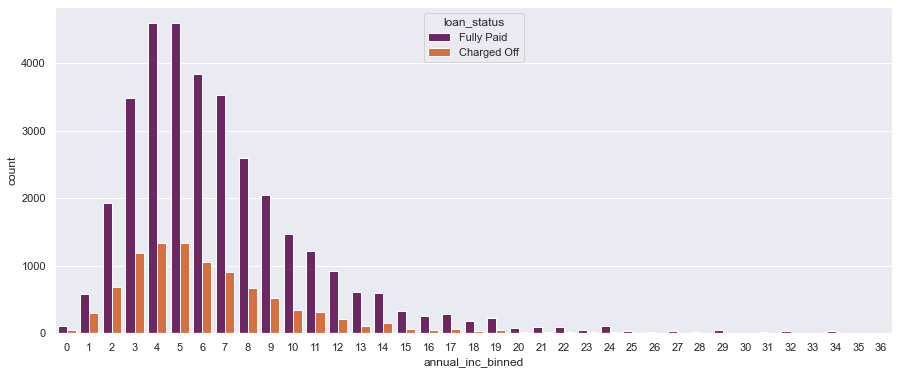

In [42]:
sns.countplot(data = df_annual_inc, x='annual_inc_binned',hue='loan_status',palette='inferno')

You can see that more people from lower annual_inc_binned were more likely to be charged off than those of a higher annual income binned. This could be a factor for default.

#### Delinq_2yrs VS Loan status

In [43]:
df.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True)

delinq_2yrs  loan_status
0            Fully Paid     0.7853565733150547
             Charged Off    0.2146434266849453
1            Fully Paid     0.7631384159881569
             Charged Off   0.23686158401184307
2            Fully Paid     0.7686945500633714
             Charged Off   0.23130544993662863
3            Fully Paid     0.7577854671280276
             Charged Off    0.2422145328719723
4            Fully Paid     0.7827868852459017
             Charged Off   0.21721311475409835
5            Fully Paid     0.6267605633802817
             Charged Off    0.3732394366197183
6            Fully Paid     0.7831325301204819
             Charged Off   0.21686746987951808
7            Fully Paid     0.7777777777777778
             Charged Off    0.2222222222222222
8            Fully Paid     0.6956521739130435
             Charged Off   0.30434782608695654
9            Fully Paid                 0.6875
             Charged Off                0.3125
10           Fully Paid     0.85714

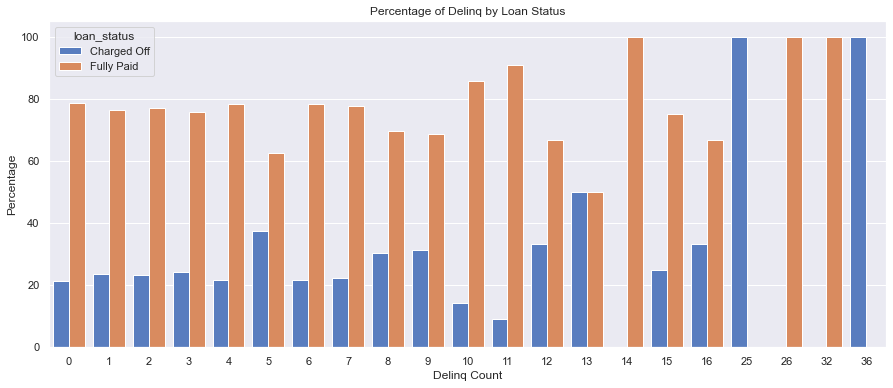

In [44]:
df_delinq = df.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).rename('PERCENTAGE').mul(100).sort_index().reset_index() #normalise the data

graph_3 = sns.barplot(x='delinq_2yrs',y='PERCENTAGE',hue='loan_status',data=df_delinq, palette="muted");

plt.title("Percentage of Delinq by Loan Status")
plt.xlabel('Delinq Count');
plt.ylabel('Percentage');
plt.show()

Takeaway: You can see that as the number of delinq count for the 2 years increase, the more likely they are to be charged off from the loan.

#### Inq_last_6mths VS loan_status

In [45]:
df['inq_last_6mths'].isnull().sum() #see missing value

0

In [46]:
df['inq_last_6mths'].value_counts()

0    27245
1    11410
2     3741
3     1158
4      264
5       82
6        3
Name: inq_last_6mths, dtype: int64

In [47]:
df.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True)

inq_last_6mths  loan_status
0               Fully Paid     0.8017250871719581
                Charged Off   0.19827491282804185
1               Fully Paid     0.7570552147239263
                Charged Off   0.24294478527607363
2               Fully Paid     0.7300187115744453
                Charged Off    0.2699812884255547
3               Fully Paid     0.7271157167530224
                Charged Off   0.27288428324697755
4               Fully Paid      0.678030303030303
                Charged Off   0.32196969696969696
5               Fully Paid     0.6463414634146342
                Charged Off   0.35365853658536583
6               Fully Paid                    1.0
Name: loan_status, dtype: float64

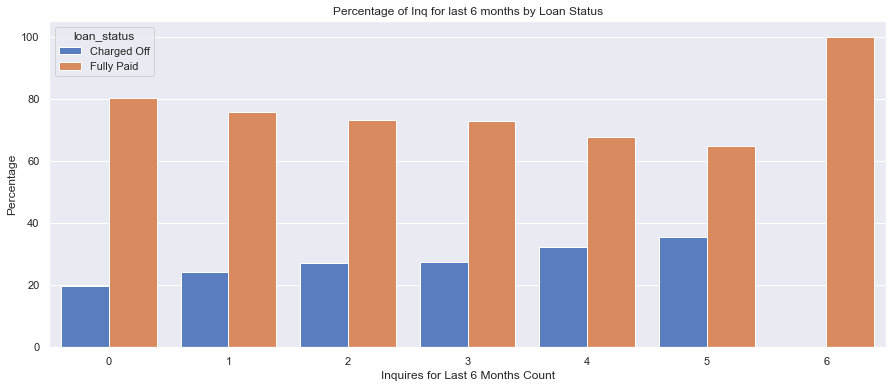

In [48]:
df_inq_last6mths = df.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).rename('PERCENTAGE').mul(100).sort_index().reset_index() #normalise the data

graph_4 = sns.barplot(x='inq_last_6mths',y='PERCENTAGE',hue='loan_status',data=df_inq_last6mths, palette="muted");

plt.title("Percentage of Inq for last 6 months by Loan Status")
plt.xlabel('Inquires for Last 6 Months Count');
plt.ylabel('Percentage');
plt.show()

As the number of inquires for the last 6 months increase, the number of people getting charged off increase. This may be due to them probably asking the banks for extensions / lesser installments when they do not have the means to pay for the monthly installment

#### Outliers

In [49]:
df['annual_inc'].describe()

count             43903.0
mean    76992.24416418013
std     90467.30750653974
min                   0.0
25%               45000.0
50%               65000.0
75%               91000.0
max            10999200.0
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

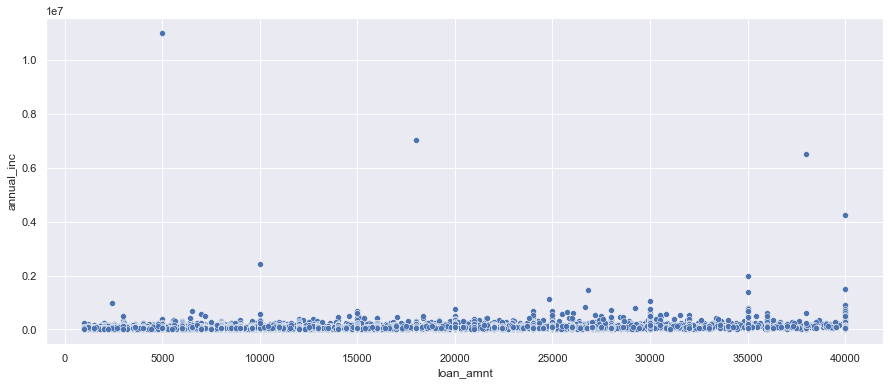

In [50]:
sns.scatterplot(data=df, x="loan_amnt", y="annual_inc")

Text(0.5, 0, 'Annual Inc')

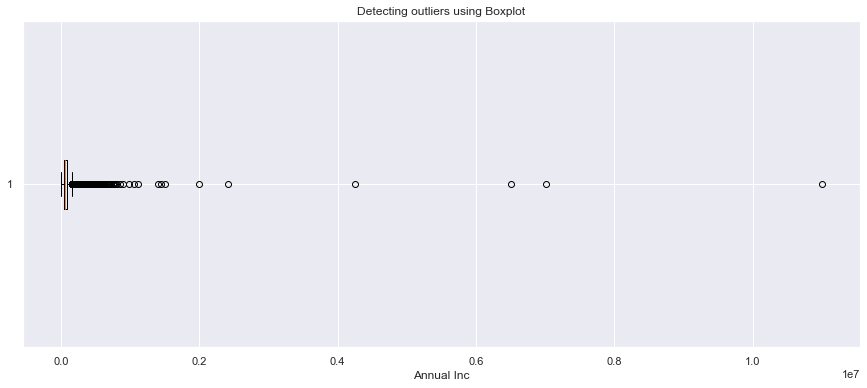

In [51]:
plt.boxplot(df['annual_inc'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Annual Inc')

Takeaway: We can see that annual_inc has a very big value. Let's look more into this

In [52]:
df['annual_inc'].agg(['min', 'max'])

min          0.0
max   10999200.0
Name: annual_inc, dtype: float64

In [53]:
df['annual_inc'].describe()

count             43903.0
mean    76992.24416418013
std     90467.30750653974
min                   0.0
25%               45000.0
50%               65000.0
75%               91000.0
max            10999200.0
Name: annual_inc, dtype: float64

In [54]:
df[df['annual_inc']==10999200]

id   emp_title application_type home_ownership loan_status  \
24735  118198788  Consultant       Individual           RENT  Fully Paid   

       loan_amnt  int_rate  installment*term  term  installment  grade  \
24735       5000     18.06           6513.12    36       180.92      4   

        issue_d last_pymnt_d  annual_inc  annual_inc_joint  \
24735  1/9/2017    1/12/2018  10999200.0               NaN   

      verification_status verification_status_joint pymnt_plan  \
24735     Source Verified                       NaN          n   

              purpose  dti  dti_joint  delinq_2yrs  inq_fi  inq_last_12m  \
24735  major_purchase 0.07        NaN            1     1.0           0.0   

       inq_last_6mths  mort_acc  open_acc  open_acc_6m  acc_open_past_24mths  \
24735               0         0         4          0.0                     0   

       pub_rec  total_acc initial_list_status  out_prncp  out_prncp_inv  \
24735        0          7                   w          0              0   

       total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  \
24735  5720.967773           5000.0         720.97                 0.0   

       mths_since_last_record  mths_since_last_major_derog  \
24735                     NaN                         28.0   

       mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
24735                 184.0                      28.0                   13.0   

       mths_since_rcnt_il  mths_since_last_delinq  \
24735                30.0                    13.0   

       mths_since_recent_revol_delinq  mo_sin_old_il_acct  \
24735                            28.0                60.0   

       mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  \
24735                   236                    165              30   

       open_il_12m  open_il_24m  open_rv_12m  open_rv_24m  max_bal_bc  \
24735          0.0          0.0          0.0          0.0         0.0   

       avg_cur_bal  bc_open_to_buy  recoveries  chargeoff_within_12_mths  \
24735       1926.0           700.0         0.0                         0   

       collection_recovery_fee  collections_12_mths_ex_med  \
24735                      0.0                           0   

       num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  \
24735                      1               0                1            1   

       num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  \
24735          2          2              2              4   

       num_rev_tl_bal_gt_0  num_sats  num_tl_90g_dpd_24m  num_tl_op_past_12m  \
24735                    1         4                   0                   0   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
24735            57.1               0.0                     0          0   

       revol_bal_joint  
24735              NaN

We can see that although this individual makes a lot of money (10 million+), the loan amount was only 5000, very fishy.

But after some research, random forest classifier can handle outliers pretty well, which mean there is no need for me to do cleaning for the outliers.

In [55]:
df.head()

id                   emp_title application_type home_ownership  \
0  1227221                       FedEx       Individual       MORTGAGE   
1  1244543  Newland Medical Associates       Individual       MORTGAGE   
2  1372036         Spirit Aero Systems       Individual       MORTGAGE   
3  1545038     MidAtlantic Farm Credit       Individual       MORTGAGE   
4  3005981                       Damco       Individual           RENT   

  loan_status  loan_amnt  int_rate  installment*term  term  installment  \
0  Fully Paid      24000      15.8           34865.4    60       581.09   
1  Fully Paid      35000      21.0           56812.2    60       946.87   
2  Fully Paid      16800     11.55           22194.0    60        369.9   
3  Fully Paid      25200     12.12           33725.4    60       562.09   
4  Fully Paid      12000     16.29           17620.2    60       293.67   

   grade   issue_d last_pymnt_d  annual_inc  annual_inc_joint  \
0      3  1/6/2013     1/6/2018     80000.0               NaN   
1      5  1/5/2013     1/5/2018    102800.0               NaN   
2      2  1/7/2013     1/7/2018     45000.0               NaN   
3      2  1/5/2013     1/5/2018     60000.0               NaN   
4      3  1/4/2013     1/5/2018    115000.0               NaN   

  verification_status verification_status_joint pymnt_plan  \
0            Verified                       NaN          n   
1            Verified                       NaN          n   
2            Verified                       NaN          n   
3            Verified                       NaN          n   
4     Source Verified                       NaN          n   

              purpose   dti  dti_joint  delinq_2yrs  inq_fi  inq_last_12m  \
0  debt_consolidation 19.02        NaN            0     NaN           NaN   
1  debt_consolidation  22.0        NaN            0     NaN           NaN   
2         credit_card 21.01        NaN            0     NaN           NaN   
3         credit_card 12.34        NaN            0     NaN           NaN   
4         credit_card 20.76        NaN            0     NaN           NaN   

   inq_last_6mths  mort_acc  open_acc  open_acc_6m  acc_open_past_24mths  \
0               1         3        11          NaN                     4   
1               1         1         9          NaN                     5   
2               0         3        14          NaN                     6   
3               0         2        16          NaN                     4   
4               1         0        13          NaN                     5   

   pub_rec  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        0         21                   f          0              0   
1        0         24                   f          0              0   
2        0         22                   w          0              0   
3        0         33                   w          0              0   
4        0         29                   w          0              0   

   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0  34865.04213          24000.0       10865.04                 0.0   
1  56823.41136          35000.0       21823.41                 0.0   
2  22193.80999          16800.0        5393.81                 0.0   
3  33725.35128          25200.0        8525.35                 0.0   
4  17621.41291          12000.0        5621.41                 0.0   

   mths_since_last_record  mths_since_last_major_derog  mths_since_recent_bc  \
0                     NaN                          NaN                  49.0   
1                     NaN                          NaN                   2.0   
2                     NaN                         67.0                  19.0   
3                     NaN                          NaN                  12.0   
4                     NaN                          NaN                  14.0   

   mths_since_recent_bc_dlq  mths_since_recent_inq  mths_since_rcnt_il  \
0                       N

### Cleaning of data

#### Things to do here. 

1. Basic cleaning of data (missing data etc)
2. Encoding

#### Will be dropping columns that have more than 15% of the values missing since as a rule of thumb, if more than 15% of the data is missing, that column is useless since vital info is already lost.

In [56]:
to_be_dropped = []

for i in df.columns:
    if df[i].isnull().sum()>=0.15*len(df):
        print(i, df[i].isnull().sum())
        to_be_dropped.append(i)
        
# print(to_be_dropped)
df.drop(columns=to_be_dropped,axis=1, inplace=True)

annual_inc_joint 39094
verification_status_joint 39095
dti_joint 39094
mths_since_last_record 37025
mths_since_last_major_derog 32336
mths_since_recent_bc_dlq 34017
mths_since_last_delinq 22604
mths_since_recent_revol_delinq 29598
revol_bal_joint 39094


In [57]:
rows = []
for i in df.columns:
    if df[i].isnull().sum()!=0:
        rows.append([i,df[i].isnull().sum(),(df[i].isnull().sum()/df.shape[0])*100])
        
missing_values = pd.DataFrame(rows, columns=["Column Name", "No. of Missing Values","Percentage Missing"])
missing_values = missing_values.sort_values('No. of Missing Values',ascending=False)
missing_values

Column Name  No. of Missing Values   Percentage Missing
6   mths_since_recent_inq                   4549   10.361478714438649
7      mths_since_rcnt_il                   3733    8.502835797098149
0               emp_title                   3258    7.420905177322734
13             max_bal_bc                   2495    5.682982939662438
12            open_rv_24m                   2495    5.682982939662438
11            open_rv_12m                   2495    5.682982939662438
10            open_il_24m                   2495    5.682982939662438
9             open_il_12m                   2495    5.682982939662438
4             open_acc_6m                   2495    5.682982939662438
3            inq_last_12m                   2495    5.682982939662438
2                  inq_fi                   2495    5.682982939662438
8      mo_sin_old_il_acct                   1291    2.940573537115915
17       percent_bc_gt_75                    643   1.4645923968749288
15         bc_open_to_buy                    641    1.460036899528506
5    mths_since_recent_bc                    598    1.362093706580416
1                     dti                     60  0.13666492039268388
16         pct_tl_nvr_dlq                      5 0.011388743366056988
14            avg_cur_bal                      4 0.009110994692845592

In [58]:
for label in list(df):
    if len(df[label].unique()) <=2 :
        print(df[label].value_counts())
        print("\n")

Individual    39094
Joint App      4809
Name: application_type, dtype: int64


Fully Paid     34289
Charged Off     9614
Name: loan_status, dtype: int64


36    31492
60    12411
Name: term, dtype: int64


n    43903
Name: pymnt_plan, dtype: int64


w    33664
f    10239
Name: initial_list_status, dtype: int64


0    43903
Name: out_prncp, dtype: int64


0    43903
Name: out_prncp_inv, dtype: int64


0    37983
1     5920
Name: pub_rec_bankruptcies, dtype: int64




Since some columns only have 1 unique value, will be dropping it since there's no meaning out of it. Additionally, I would also be dropping initial_list_status as I have no idea what it means by 'w' and 'f'

In [59]:
only_one_unique = ['out_prncp_inv','out_prncp','pymnt_plan','initial_list_status']
df.drop(columns=only_one_unique,axis=1, inplace=True)

In [60]:
df.select_dtypes(include='object').columns

Index(['emp_title', 'application_type', 'home_ownership', 'loan_status',
       'issue_d', 'last_pymnt_d', 'verification_status', 'purpose'],
      dtype='object')

In [61]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

emp_title              18108
application_type           2
home_ownership             5
loan_status                2
issue_d                   16
last_pymnt_d              27
verification_status        3
purpose                   13
dtype: int64

In [62]:
df['id'].is_unique

True

As I believe that emp_title has no use since it is too broad and there's no emp_industries present(if we have this, may be useful because it's generalised, but we don't),so I will be dropping them. I will also be dropping id as it serves no meaningful purpose in our insights, and thankfully, there are no duplicates in ID as it might have suggested that the loaner might have requested for a loan the second time. pymnt_plan is also dropped as all of them dont have payment plan (1 unique value too), so there's no use

In [63]:
df.drop(columns=['id','emp_title'],axis=1, inplace=True)

In [64]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

application_type        2
home_ownership          5
loan_status             2
issue_d                16
last_pymnt_d           27
verification_status     3
purpose                13
dtype: int64

In [65]:
categorical_columns = ['application_type', 'home_ownership','verification_status','purpose']

In [66]:
df[categorical_columns]

application_type home_ownership verification_status             purpose
0           Individual       MORTGAGE            Verified  debt_consolidation
1           Individual       MORTGAGE            Verified  debt_consolidation
2           Individual       MORTGAGE            Verified         credit_card
3           Individual       MORTGAGE            Verified         credit_card
4           Individual           RENT     Source Verified         credit_card
...                ...            ...                 ...                 ...
43898       Individual           RENT        Not Verified         credit_card
43899       Individual       MORTGAGE        Not Verified         credit_card
43900       Individual       MORTGAGE     Source Verified         credit_card
43901       Individual           RENT     Source Verified  debt_consolidation
43902       Individual           RENT     Source Verified  debt_consolidation

[43903 rows x 4 columns]

In [67]:
my_df1 = pd.get_dummies(df[categorical_columns]) #getting the dumies
df = pd.concat([df, my_df1], axis=1) #concatenate it to our dummies
df.drop(columns=categorical_columns,inplace=True,axis=1)

In [68]:
df.head()

loan_status  loan_amnt  int_rate  installment*term  term  installment  \
0  Fully Paid      24000      15.8           34865.4    60       581.09   
1  Fully Paid      35000      21.0           56812.2    60       946.87   
2  Fully Paid      16800     11.55           22194.0    60        369.9   
3  Fully Paid      25200     12.12           33725.4    60       562.09   
4  Fully Paid      12000     16.29           17620.2    60       293.67   

   grade   issue_d last_pymnt_d  annual_inc   dti  delinq_2yrs  inq_fi  \
0      3  1/6/2013     1/6/2018     80000.0 19.02            0     NaN   
1      5  1/5/2013     1/5/2018    102800.0  22.0            0     NaN   
2      2  1/7/2013     1/7/2018     45000.0 21.01            0     NaN   
3      2  1/5/2013     1/5/2018     60000.0 12.34            0     NaN   
4      3  1/4/2013     1/5/2018    115000.0 20.76            0     NaN   

   inq_last_12m  inq_last_6mths  mort_acc  open_acc  open_acc_6m  \
0           NaN               1         3        11          NaN   
1           NaN               1         1         9          NaN   
2           NaN               0         3        14          NaN   
3           NaN               0         2        16          NaN   
4           NaN               1         0        13          NaN   

   acc_open_past_24mths  pub_rec  total_acc  total_pymnt  total_rec_prncp  \
0                     4        0         21  34865.04213          24000.0   
1                     5        0         24  56823.41136          35000.0   
2                     6        0         22  22193.80999          16800.0   
3                     4        0         33  33725.35128          25200.0   
4                     5        0         29  17621.41291          12000.0   

   total_rec_int  total_rec_late_fee  mths_since_recent_bc  \
0       10865.04                 0.0                  49.0   
1       21823.41                 0.0                   2.0   
2        5393.81                 0.0                  19.0   
3        8525.35                 0.0                  12.0   
4        5621.41                 0.0                  14.0   

   mths_since_recent_inq  mths_since_rcnt_il  mo_sin_old_il_acct  \
0                    3.0                 NaN               129.0   
1                    6.0                 NaN                85.0   
2                    8.0                 NaN               180.0   
3                   10.0                 NaN               153.0   
4                    6.0                 NaN               167.0   

   mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  open_il_12m  \
0                   231                     11              11          NaN   
1                   210                      2               2          NaN   
2                   432                     19               8          NaN   
3                   127                     12              12          NaN   
4                   149                      7               7          NaN   

   open_il_24m  open_rv_12m  open_rv_24m  max_bal_bc  avg_cur_bal  \
0          NaN          NaN          NaN         NaN      15150.0   
1          NaN          NaN          NaN         NaN      12248.0   
2          NaN          NaN          NaN         NaN       9635.0   
3          NaN          NaN          NaN         NaN      15802.0   
4          NaN          NaN          NaN         NaN       5302.0   

   bc_open_to_buy  recoveries  chargeoff_within_12_mths  \
0           674.0         0.0                         0   
1         11531.0         0.0                         0   
2         10692.0         0.0                         0   
3         25536.0         0.0                         0   
4          2273.0         0.0                         0   

   collection_recovery_fee  collections_12_mths_ex_med  num_accts_ever_120_pd  \
0                      0.0                           0                      0   
1                      0.0                   

In [69]:
loan_status_map = {'Fully Paid':0, 'Charged Off':1}
df['loan_status'] = df['loan_status'].map(loan_status_map) #mapping loan status to 0 and 1

In [70]:
df['loan_status'].value_counts()

0    34289
1     9614
Name: loan_status, dtype: int64

In [71]:
df.isnull().sum()

loan_status                               0
loan_amnt                                 0
int_rate                                  0
installment*term                          0
term                                      0
installment                               0
grade                                     0
issue_d                                   0
last_pymnt_d                              0
annual_inc                                0
dti                                      60
delinq_2yrs                               0
inq_fi                                 2495
inq_last_12m                           2495
inq_last_6mths                            0
mort_acc                                  0
open_acc                                  0
open_acc_6m                            2495
acc_open_past_24mths                      0
pub_rec                                   0
total_acc                                 0
total_pymnt                               0
total_rec_prncp                 

<a id="remove-noise-tl"></a>
### 2.3: Find and remove target leakage and noise


As our target is the loan_status, there may be other factors that is also highly correlated to loan_status. We shall plot out a correlation heat map and find out if there are any factors that contributes to this

In [72]:
corr_map = df.corr(method='spearman')
corr_map.style.background_gradient(cmap='Reds')

corr_target = abs(corr_map['loan_status'])
relevant_features_positive = corr_target[corr_target>0.1]
relevant_features_positive.sort_values(ascending=False)

loan_status                               1.0
recoveries                   0.79772992617089
collection_recovery_fee    0.7977299234242389
total_rec_prncp            0.5117473115352621
total_pymnt               0.32176992986997077
total_rec_late_fee        0.29559290943627325
int_rate                  0.23329689519837435
grade                     0.22815121392341103
term                      0.12270179235096326
installment*term          0.10850213621535765
mort_acc                  0.10694309825188346
Name: loan_status, dtype: float64

Based on domain  knowledge, recoveries and collection_recovery_fee is a target leakage. Here's how I justify it

recoveries and collection_recovery_fee is a target leakage since it happened only when someone is charged off, we need to  remove it.

Using point biserial:
1. The point biserial correlation coefficient is the same as the Pearson correlation coefficient used in linear regression (measured from -1 to 1). 
2. The only difference is we are comparing dichotomous data to continuous data instead of continuous data to continuous (pearson) data. (copied from online)

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.

In [73]:
from scipy import stats

print("loan_status and recoveries: ",stats.pointbiserialr(df['loan_status'], df['recoveries']))
print("loan_status and collection_recovery_fee: ",stats.pointbiserialr(df['loan_status'], df['collection_recovery_fee']))

loan_status and recoveries:  PointbiserialrResult(correlation=0.5318741592805303, pvalue=0.0)
loan_status and collection_recovery_fee:  PointbiserialrResult(correlation=0.525685044596754, pvalue=0.0)


In [74]:
df.drop(columns=['recoveries','collection_recovery_fee'],inplace=True,axis=1)

#### Columns that must be dropped too based on domain knowledge

In [75]:
tl_to_drop = ['issue_d','total_pymnt','last_pymnt_d', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','collections_12_mths_ex_med']

In [76]:
df.drop(columns=tl_to_drop,inplace=True,axis=1)

In [77]:
df.head()

loan_status  loan_amnt  int_rate  installment*term  term  installment  \
0            0      24000      15.8           34865.4    60       581.09   
1            0      35000      21.0           56812.2    60       946.87   
2            0      16800     11.55           22194.0    60        369.9   
3            0      25200     12.12           33725.4    60       562.09   
4            0      12000     16.29           17620.2    60       293.67   

   grade  annual_inc   dti  delinq_2yrs  inq_fi  inq_last_12m  inq_last_6mths  \
0      3     80000.0 19.02            0     NaN           NaN               1   
1      5    102800.0  22.0            0     NaN           NaN               1   
2      2     45000.0 21.01            0     NaN           NaN               0   
3      2     60000.0 12.34            0     NaN           NaN               0   
4      3    115000.0 20.76            0     NaN           NaN               1   

   mort_acc  open_acc  open_acc_6m  acc_open_past_24mths  pub_rec  total_acc  \
0         3        11          NaN                     4        0         21   
1         1         9          NaN                     5        0         24   
2         3        14          NaN                     6        0         22   
3         2        16          NaN                     4        0         33   
4         0        13          NaN                     5        0         29   

   mths_since_recent_bc  mths_since_recent_inq  mths_since_rcnt_il  \
0                  49.0                    3.0                 NaN   
1                   2.0                    6.0                 NaN   
2                  19.0                    8.0                 NaN   
3                  12.0                   10.0                 NaN   
4                  14.0                    6.0                 NaN   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0               129.0                   231                     11   
1                85.0                   210                      2   
2               180.0                   432                     19   
3               153.0                   127                     12   
4               167.0                   149                      7   

   mo_sin_rcnt_tl  open_il_12m  open_il_24m  open_rv_12m  open_rv_24m  \
0              11          NaN          NaN          NaN          NaN   
1               2          NaN          NaN          NaN          NaN   
2               8          NaN          NaN          NaN          NaN   
3              12          NaN          NaN          NaN          NaN   
4               7          NaN          NaN          NaN          NaN   

   max_bal_bc  avg_cur_bal  bc_open_to_buy  chargeoff_within_12_mths  \
0         NaN      15150.0           674.0                         0   
1         NaN      12248.0         11531.0                         0   
2         NaN       9635.0         10692.0                         0   
3         NaN      15802.0         25536.0                         0   
4         NaN       5302.0          2273.0                         0   

   num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  \
0                      0               3                6            3   
1                      0               4                4            6   
2                      1               3                4            4   
3                      0               6                8            9   
4                      0               5                8            6   

   num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  \
0          7          7              6             10                    6   
1         15          5              7             18                    4   
2          4          9              9             10                    4   
3         13          7             13             24                    8   
4         14         11      

<a id="select-features"></a>
### 3.1: Selecting features to use


In [78]:
#ensure that training set DOES NOT HAVE target leakage

X = df.drop(columns=['loan_status'])

y = df['loan_status']

In [79]:
X.shape,y.shape

((43903, 72), (43903,))

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32927, 72), (10976, 72), (32927,), (10976,))

In [81]:
def showMissing(df):
    for i in df.columns:
        if df[i].isnull().sum()>0: #show columns with >=1 missing value
            print(f"{i} -> {df[i].isnull().sum()}")
            
print("X_train")
showMissing(X_train)
print("_"*60)
print("X_test")
showMissing(X_test)

X_train
dti -> 41
inq_fi -> 1877
inq_last_12m -> 1877
open_acc_6m -> 1877
mths_since_recent_bc -> 448
mths_since_recent_inq -> 3413
mths_since_rcnt_il -> 2771
mo_sin_old_il_acct -> 933
open_il_12m -> 1877
open_il_24m -> 1877
open_rv_12m -> 1877
open_rv_24m -> 1877
max_bal_bc -> 1877
avg_cur_bal -> 4
bc_open_to_buy -> 473
pct_tl_nvr_dlq -> 4
percent_bc_gt_75 -> 474
____________________________________________________________
X_test
dti -> 19
inq_fi -> 618
inq_last_12m -> 618
open_acc_6m -> 618
mths_since_recent_bc -> 150
mths_since_recent_inq -> 1136
mths_since_rcnt_il -> 962
mo_sin_old_il_acct -> 358
open_il_12m -> 618
open_il_24m -> 618
open_rv_12m -> 618
open_rv_24m -> 618
max_bal_bc -> 618
bc_open_to_buy -> 168
pct_tl_nvr_dlq -> 1
percent_bc_gt_75 -> 169


To prevent data leakage, we do the cleaning after the splitting. We fill missing values of the test values with the mean of the train value

In [82]:
X_train = X_train.fillna(X_train.mean()).astype('int')
X_test = X_test.fillna(X_train.mean()).astype('int')

In [83]:
X_train.head()

loan_amnt  int_rate  installment*term  term  installment  grade  \
15281       2500         9              2901    36           80      2   
31731      15000        23             25828    60          430      5   
33303      20000         7             22552    36          626      1   
33366      15000         6             16604    36          461      1   
25836      30000        16             43792    60          729      3   

       annual_inc  dti  delinq_2yrs  inq_fi  inq_last_12m  inq_last_6mths  \
15281       52500   28            0       0             0               0   
31731       37500   20            1       3             0               0   
33303      140000   15            1       3             2               2   
33366      115000    9            0       0             2               1   
25836       86000   35            0       1             1               0   

       mort_acc  open_acc  open_acc_6m  acc_open_past_24mths  pub_rec  \
15281         1         7            1                     2        0   
31731         1        14            0                     2        0   
33303         5        15            0                     2        0   
33366         0        12            2                     4        0   
25836         1        13            0                     2        0   

       total_acc  mths_since_recent_bc  mths_since_recent_inq  \
15281         21                     4                      6   
31731         28                   107                     18   
33303         35                    26                      3   
33366         15                     3                      4   
25836         27                    56                      8   

       mths_since_rcnt_il  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
15281                  24                 132                   264   
31731                  13                 144                   144   
33303                  59                 219                   222   
33366                  37                  55                    95   
25836                   8                 122                   178   

       mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  open_il_12m  open_il_24m  \
15281                      4               4            0            1   
31731                     30              13            0            2   
33303                     26              14            0            0   
33366                      3               3            0            0   
25836                     56               8            1            2   

       open_rv_12m  open_rv_24m  max_bal_bc  avg_cur_bal  bc_open_to_buy  \
15281            1            1        3346        11617            6184   
31731            0            0        2401         6347            3599   
33303            0            0        6147        32205           38142   
33366            3            4        6237         3203           56399   
25836            0            0       22833         7295           11238   

       chargeoff_within_12_mths  num_accts_ever_120_pd  num_actv_bc_tl  \
15281                         0                      0               2   
31731                         0                      1               1   
33303                         0                      0               5   
33366                         0                      0               7   
25836                         0                      0               4   

       num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
15281                3            2          9          8              4   
31731                3            1          4         14              5   
33303                5            7         10         16             10   
33366                7           10         10          2             11   
25836                7            5          8         13              9   

       num_rev_accts  num_rev_tl_bal_g

In [84]:
print("X_train")
showMissing(X_train)
print("_"*60)
print("X_test")
showMissing(X_test)

X_train
____________________________________________________________
X_test


No missing values now

<a id="build-model"></a>
### 3.2: Building Models

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=randomstate,n_jobs=-1) #let it grow without restriction for now
rfc_model = rfc.fit(X_train,y_train) #fit model

#just an example only, on why we cant use scoring
print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

0.9999696297871048
0.7895408163265306


Since our data set is imabalanced, there's no use for accuracy. If there's 90% of 0 (for example), randomly anyhow pick also can pick something with value of 0 with accuracy of 90%

In [86]:
from sklearn.inspection import permutation_importance
#from the tuned model built from best params
y_pred_test = rfc_model.predict(X_test)
r = permutation_importance(rfc_model, X_test, y_pred_test,
                            n_repeats=30,
                            random_state=randomstate)

#sort the mean values of the permutation importance in descending order
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8} -> " f"{r.importances_mean[i]:.3f}" f" +/- {r.importances_std[i]:.3f}")

int_rate -> 0.023 +/- 0.001
installment*term -> 0.021 +/- 0.001
term     -> 0.019 +/- 0.001
grade    -> 0.019 +/- 0.001
max_bal_bc -> 0.017 +/- 0.001
avg_cur_bal -> 0.016 +/- 0.001
installment -> 0.014 +/- 0.001
loan_amnt -> 0.014 +/- 0.001
open_rv_24m -> 0.014 +/- 0.001
mort_acc -> 0.014 +/- 0.001
bc_open_to_buy -> 0.013 +/- 0.001
mo_sin_old_rev_tl_op -> 0.013 +/- 0.001
total_acc -> 0.012 +/- 0.001
annual_inc -> 0.012 +/- 0.001
dti      -> 0.011 +/- 0.001
num_actv_rev_tl -> 0.011 +/- 0.001
mths_since_rcnt_il -> 0.010 +/- 0.001
inq_last_12m -> 0.010 +/- 0.001
mo_sin_old_il_acct -> 0.010 +/- 0.001
acc_open_past_24mths -> 0.010 +/- 0.001
mths_since_recent_inq -> 0.009 +/- 0.001
mths_since_recent_bc -> 0.009 +/- 0.001
mo_sin_rcnt_rev_tl_op -> 0.009 +/- 0.001
percent_bc_gt_75 -> 0.009 +/- 0.001
num_rev_accts -> 0.008 +/- 0.001
open_rv_12m -> 0.008 +/- 0.001
num_il_tl -> 0.008 +/- 0.001
open_acc_6m -> 0.008 +/- 0.001
mo_sin_rcnt_tl -> 0.008 +/- 0.000
num_op_rev_tl -> 0.008 +/- 0.000
num_act

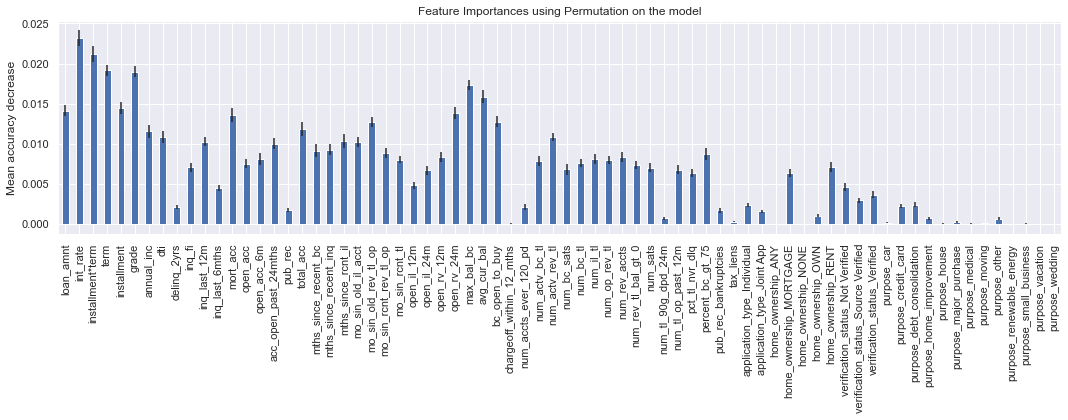

In [87]:
forest_importances = pd.Series(r.importances_mean, index=X_test.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=r.importances_std, ax=ax)
ax.set_title("Feature Importances using Permutation on the model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Building DTC as an example to compare against RFC

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=randomstate)
dtc_model = dtc.fit(X_train,y_train)

#just an example only, on why we cant use scoring
print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))

1.0
0.6871355685131195


See the score? It's way too good to be true. 1.0 on training set is god-like. The test score was pretty bad.

In [89]:
import sklearn.metrics as metrics

#give precision, recall & f1 (balance between precision & recall)
#function so that we dont have to keep copying and pasting the statement
#average is macro-> 'macro' calculates the F1 separated by class but not using weights for the aggregation:
#F1class1+F1class2+⋅⋅⋅+F1classN
#which resuls in a bigger penalisation when your model does not perform well with the minority classes.
def printTrainScores(y_actual,y_pred):
    print(f"Precision for training set is {metrics.precision_score(y_actual,y_pred, average='macro')}")
    print(f"Recall for training set is {metrics.recall_score(y_actual,y_pred, average='macro')}")
    print(f"F1 score for training set is {metrics.f1_score(y_actual,y_pred, average='macro')}")
    print(f"MCC for training set is {metrics.matthews_corrcoef(y_actual,y_pred)}")

def printTestScores(y_actual,y_pred):
    print(f"Precision for testing set is {metrics.precision_score(y_actual,y_pred, average='macro')}")
    print(f"Recall for testing set is {metrics.recall_score(y_actual,y_pred, average='macro')}")
    print(f"F1 score for testing set is {metrics.f1_score(y_actual,y_pred, average='macro')}")
    print(f"MCC for testing set is {metrics.matthews_corrcoef(y_actual,y_pred)}")

In [90]:
#predictions for dtc and rfc model

y_pred_train_dtc = dtc_model.predict(X_train)
y_pred_test_dtc = dtc_model.predict(X_test)

y_pred_train_rfc = rfc_model.predict(X_train)
y_pred_test_rfc = rfc_model.predict(X_test)

#### DTC Scoring

In [91]:
printTrainScores(y_train,y_pred_train_dtc)
print()
printTestScores(y_test,y_pred_test_dtc)

Precision for training set is 1.0
Recall for training set is 1.0
F1 score for training set is 1.0
MCC for training set is 1.0

Precision for testing set is 0.5558907802413754
Recall for testing set is 0.5604034135489065
F1 score for testing set is 0.5575532683947275
MCC for testing set is 0.11620660760027117


#### RFC Scoring

In [92]:
printTrainScores(y_train,y_pred_train_rfc)
print()
printTestScores(y_test,y_pred_test_rfc)

Precision for training set is 0.9999805394465419
Recall for training set is 0.9999308914996545
F1 score for training set is 0.9999557128955805
MCC for training set is 0.9999114297136278

Precision for testing set is 0.6909174037455259
Recall for testing set is 0.5403440196324485
F1 score for testing set is 0.5254552788630763
MCC for testing set is 0.17552635682296375


- Precision: The ratio of correctly predicted positive observations to the total predicted positive observations
- Recall : The ratio of correctly predicted positive observations to the all observations in actual class.
- F1 Score: The weighted average of precision and recall, useful than accuracy when you have an uneven class distribution
- MCC: a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

MCC takes on the range of -1 to 1:

- 1 being perfect prediction
- -1 being total disagreement
any value close to zero indicates a random guess, which in the case we observed for this RFC.

F1 Score for DTC was higher than RFC, but lost when it came to MCC. F1 Score is the harmonic mean between Precision and Recall

Takeaway: Notice how both the score for RFC and DTC model was so good? Near 1, this is really too good to be true, we also used all the variables there were. What happens if we only pick a select few? Will the score decrease? Of course. 

Let's do some plotting first

#### Hit Rate for Random Forest Classifier (UnPruned)

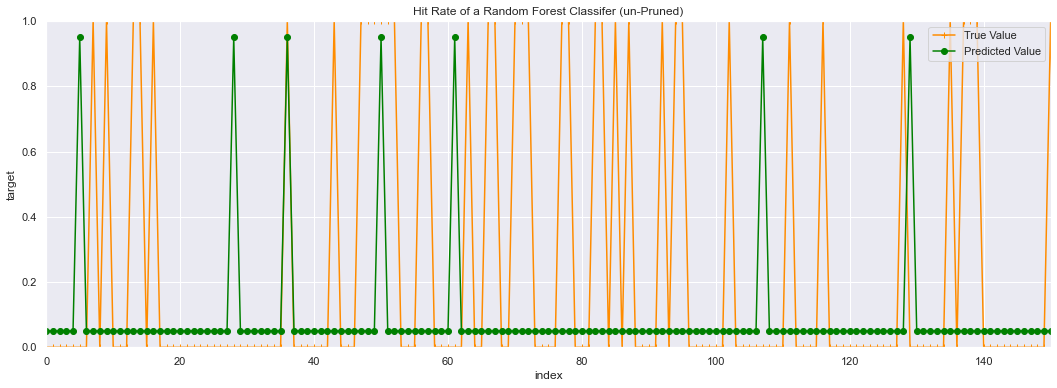

In [93]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), c="darkorange",marker="+", label="True Value")
#purposely set the offset to see both markers at the same index
plt.plot(y_pred_test_rfc*0.9+0.05, c="green",marker="o", label="Predicted Value")

plt.xlabel("index")
plt.ylabel("target")
plt.ylim(0,1)
plt.xlim(0,150)
plt.title("Hit Rate of a Random Forest Classifer (un-Pruned)")

plt.legend()
plt.show()

#### Hit Rate of a Decision Tree Classifer (un-Pruned)

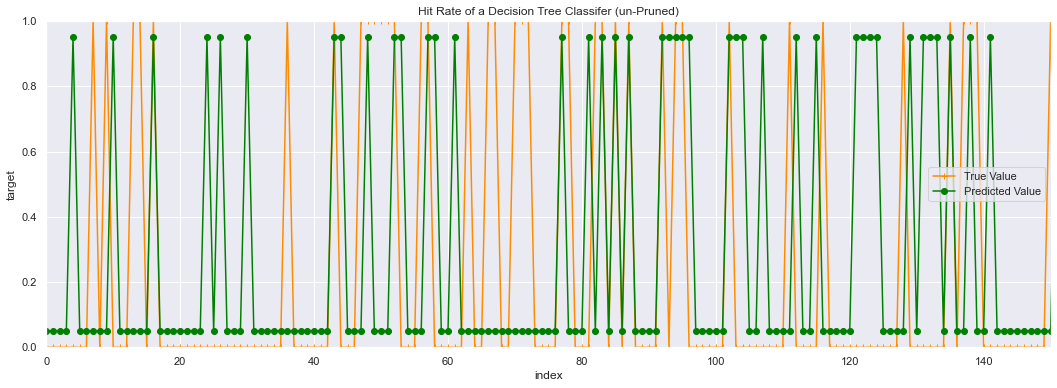

In [94]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), c="darkorange",marker="+", label="True Value")
#purposely set the offset to see both markers at the same index
plt.plot(y_pred_test_dtc*0.9+0.05, c="green",marker="o", label="Predicted Value")

plt.xlabel("index")
plt.ylabel("target")
plt.ylim(0,1)
plt.xlim(0,150)
plt.title("Hit Rate of a Decision Tree Classifer (un-Pruned)")

plt.legend()
plt.show()

Takeaway: You can see that DTC was more likely to predict the true value than RFC

#### Confusion Matrix for Random Forest Classifier

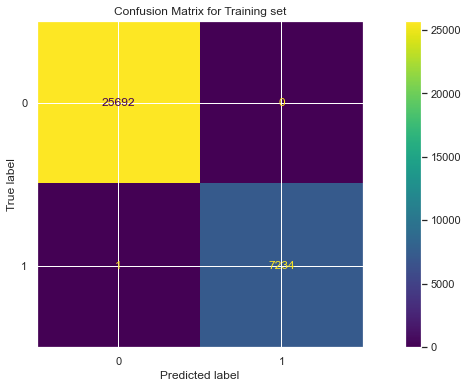

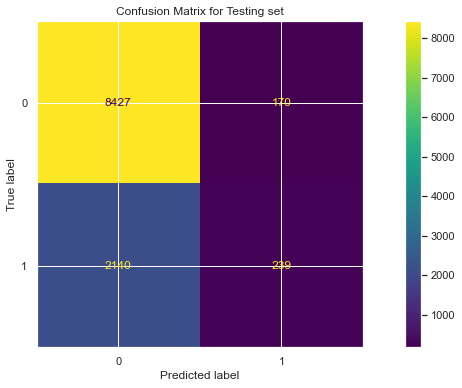

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#y_test is the true label
#calculate the confusion matrix, named it cm
cm_train_no = confusion_matrix(y_train, y_pred_train_rfc, labels=rfc.classes_)
cm_test_no = confusion_matrix(y_test, y_pred_test_rfc, labels=rfc.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_no,display_labels=rfc.classes_)
disp1.plot()
plt.title('Confusion Matrix for Training set')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_no,display_labels=rfc.classes_)
disp2.plot()
plt.title('Confusion Matrix for Testing set')
plt.show()

Training set for RFC was spot on, very very low FN and FP, but it is suspicious as when it comes to the testing set, the predictions goes downhill (increased)

####  Confusion Matrix for Decision Tree Classifier

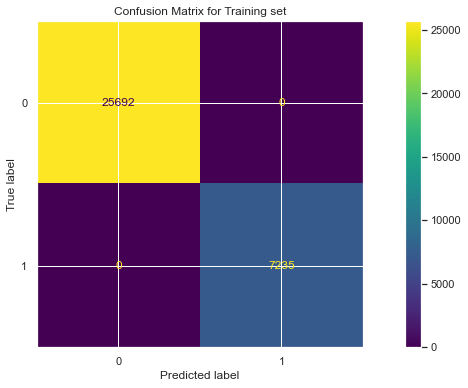

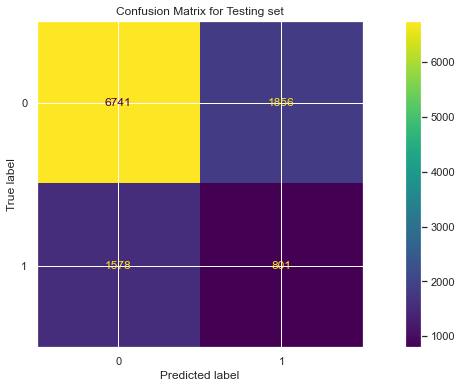

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#y_test is the true label
#calculate the confusion matrix, named it cm
cm_train_no = confusion_matrix(y_train, y_pred_train_dtc, labels=dtc.classes_)
cm_test_no = confusion_matrix(y_test, y_pred_test_dtc, labels=dtc.classes_)
#diplay the matrix
disp1_1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_no,display_labels=dtc.classes_)
disp1_1.plot()
plt.title('Confusion Matrix for Training set')
disp2_1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_no,display_labels=dtc.classes_)
disp2_1.plot()
plt.title('Confusion Matrix for Testing set')
plt.show()

Takeaway: Similar to RFC, the training set was good, but when it comes to testing set, the predictions rate also fell.
    
Model Comparision (test set):
    
- RFC had a better precision (TP+[TP+FP]) rate than DTC 
- DTC however, had a better recall rate than RFC
- DTC Had a better F1 score than RFC
- RFC had a better MCC Score than DTC

We look at the MCC score as it is a more reliable statistical rate which produces a high score ONLY IF the prediction obtained good results in all of the 4 confusion matrix categories (TP,TN,FP,FN)

#### With StratifiedKFold now

In [97]:
from sklearn.model_selection import StratifiedKFold
import collections

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate)

for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print (collections.Counter(y_train))
    print (collections.Counter(y_test))

Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7692})
Counter({0: 6858, 1: 1922})
Counter({0: 27432, 1: 7691})
Counter({0: 6857, 1: 1923})


In [98]:
print (collections.Counter(y_train))
print (collections.Counter(y_test))

Counter({0: 27432, 1: 7691})
Counter({0: 6857, 1: 1923})


In [99]:
#view the distribution
print(7691/27432)
print(1923/6857)

0.28036599591717704
0.2804433425696369


In [100]:
print("X_train missing values")
showMissing(X_train)
print('_'*40)
print("X_test missing values")
showMissing(X_test)

X_train missing values
dti -> 45
inq_fi -> 1982
inq_last_12m -> 1982
open_acc_6m -> 1982
mths_since_recent_bc -> 473
mths_since_recent_inq -> 3643
mths_since_rcnt_il -> 2965
mo_sin_old_il_acct -> 1025
open_il_12m -> 1982
open_il_24m -> 1982
open_rv_12m -> 1982
open_rv_24m -> 1982
max_bal_bc -> 1982
avg_cur_bal -> 3
bc_open_to_buy -> 509
pct_tl_nvr_dlq -> 4
percent_bc_gt_75 -> 511
________________________________________
X_test missing values
dti -> 15
inq_fi -> 513
inq_last_12m -> 513
open_acc_6m -> 513
mths_since_recent_bc -> 125
mths_since_recent_inq -> 906
mths_since_rcnt_il -> 768
mo_sin_old_il_acct -> 266
open_il_12m -> 513
open_il_24m -> 513
open_rv_12m -> 513
open_rv_24m -> 513
max_bal_bc -> 513
avg_cur_bal -> 1
bc_open_to_buy -> 132
pct_tl_nvr_dlq -> 1
percent_bc_gt_75 -> 132


In [101]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)

#prevent data leakage, do transformation only after fitting the x train and apply to both x train and x test
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [102]:
rfc_skf = RandomForestClassifier(n_jobs=-1,random_state=randomstate)
rfc_skf_model=rfc_skf.fit(X_train, y_train)

#only showing as an example, not looking at this score
print(rfc_skf_model.score(X_train,y_train))
print(rfc_skf_model.score(X_test,y_test))

1.0
0.7908883826879272


In [103]:
import sklearn.metrics as metrics
y_pred_train_rfc_skf = rfc_skf_model.predict(X_train)
y_pred_test_rfc_skf = rfc_skf_model.predict(X_test)

printTrainScores(y_train,y_pred_train_rfc_skf)
print()
printTestScores(y_test,y_pred_test_rfc_skf)

Precision for training set is 1.0
Recall for training set is 1.0
F1 score for training set is 1.0
MCC for training set is 1.0

Precision for testing set is 0.7115298721811629
Recall for testing set is 0.5469428927368557
F1 score for testing set is 0.5355554723221823
MCC for testing set is 0.19929700550124815


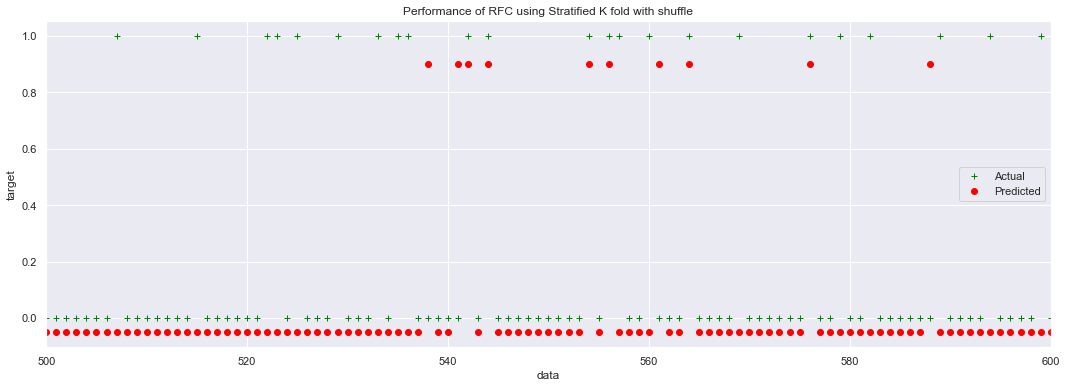

In [104]:
y_mc_train = rfc_skf_model.predict(X_train)
y_mc_test = rfc_skf_model.predict(X_test)

plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), c="green",marker="+", linestyle='None', label="Actual")
plt.plot(y_mc_test*0.95-0.05, c="red",marker="o",linestyle='None', label="Predicted")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Performance of RFC using Stratified K fold with shuffle")

plt.xlim(500,600)
plt.legend()
plt.show()

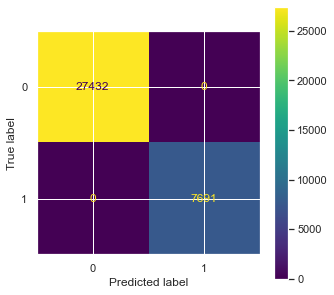

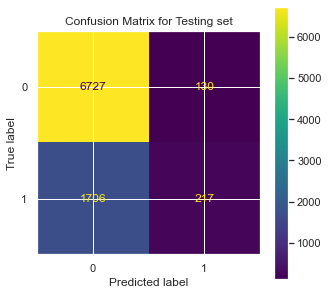

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#y_test is the true label
#calculate the confusion matrix, named it cm
fig, ax = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))
cm_train_rfc_mc = confusion_matrix(y_train, y_mc_train, labels=rfc_skf.classes_)
cm_test_rfc_mc = confusion_matrix(y_test, y_mc_test, labels=rfc_skf.classes_)
#diplay the matrix
disp1_2 = ConfusionMatrixDisplay(confusion_matrix=cm_train_rfc_mc,display_labels=rfc_skf.classes_)
disp1_2.plot(ax=ax)
plt.title('Confusion Matrix for Training set')
disp2_2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_rfc_mc,display_labels=rfc_skf.classes_)
disp2_2.plot(ax=ax2)

plt.title('Confusion Matrix for Testing set')
plt.show()

Confusion Matrix result is very bad. In the training set, it predicted 0 FP and FN result, but when it comes to testing set, the prediction was so bad such that the FP and FN shot up.

* Note I would only be using RandomForestClassifier from here onwards for simplicity

<a id='hyperparameter-tuning'></a>
### 3.4: Doing hyper-parameter tuning to achieve best score (With selected Featuers)

#### In this, we would only be using selected features according to the permutation importance and what we orginally selected.
We will also be using StratifiedKFold too.

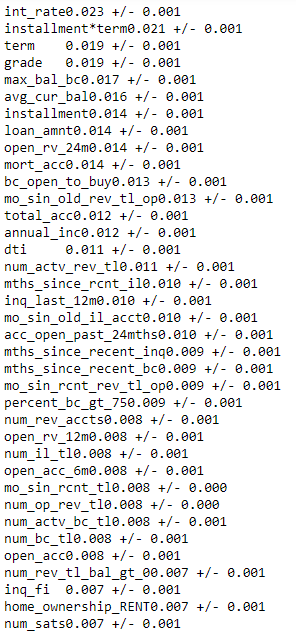

In [106]:
X = df[['int_rate','installment*term','grade','avg_cur_bal' ,'loan_amnt' ,'open_rv_24m' ,'mort_acc' ,\
        'bc_open_to_buy','mo_sin_old_rev_tl_op' ,'total_acc' , 'annual_inc' ,'dti','num_actv_rev_tl' ,'mths_since_rcnt_il'\
        ,'inq_last_12m' ,'mo_sin_old_il_acct' ,'acc_open_past_24mths','mths_since_recent_inq','max_bal_bc','open_acc']]
#set the target for modelling
y = df['loan_status']

In [107]:
showMissing(X)

avg_cur_bal -> 4
open_rv_24m -> 2495
bc_open_to_buy -> 641
dti -> 60
mths_since_rcnt_il -> 3733
inq_last_12m -> 2495
mo_sin_old_il_acct -> 1291
mths_since_recent_inq -> 4549
max_bal_bc -> 2495


Can see that some columns have missing values. Will clean it after splitting to prevent data leakage.

In [108]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate) #declare skf with splits of 5

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print (collections.Counter(y_train))
    print (collections.Counter(y_test))

Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7691})
Counter({0: 6858, 1: 1923})
Counter({0: 27431, 1: 7692})
Counter({0: 6858, 1: 1922})
Counter({0: 27432, 1: 7691})
Counter({0: 6857, 1: 1923})


In [109]:
#impute the missing value with the mean of x_train, prevent data leakage
X_train = X_train.fillna(X_train.mean()).astype('int')
X_test = X_test.fillna(X_train.mean()).astype('int')

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

pipeline_rfc = Pipeline([
    ('rfc_model_pl', RandomForestClassifier(n_jobs=-1, random_state=randomstate)) #creating a pipeline
])

#for tuning
param_grid = { 
     "rfc_model_pl__n_estimators": [5, 10, 50], 
     "rfc_model_pl__max_depth": np.arange(3, 10)
}

In [111]:
gs_pl_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid,n_jobs=-1).fit(X_train,y_train)

gs_pl_rfc.best_params_

{'rfc_model_pl__max_depth': 8, 'rfc_model_pl__n_estimators': 50}

In [112]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

y_pred_train_gs = gs_pl_rfc.best_estimator_.predict(X_train)
y_pred_test_gs = gs_pl_rfc.best_estimator_.predict(X_test)

printTrainScores(y_train,y_pred_train_gs)
print()
printTestScores(y_test,y_pred_test_gs)

Precision for training set is 0.8270769870718389
Recall for training set is 0.5311123859268382
F1 score for training set is 0.501912135082042
MCC for training set is 0.20175376526416086

Precision for testing set is 0.738059938879611
Recall for testing set is 0.5190699825747149
F1 score for testing set is 0.48058594608734984
MCC for testing set is 0.13475605939878021


In [113]:
print(classification_report(y_test, y_pred_test_gs))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      6857
           1       0.69      0.04      0.08      1923

    accuracy                           0.79      8780
   macro avg       0.74      0.52      0.48      8780
weighted avg       0.77      0.79      0.70      8780



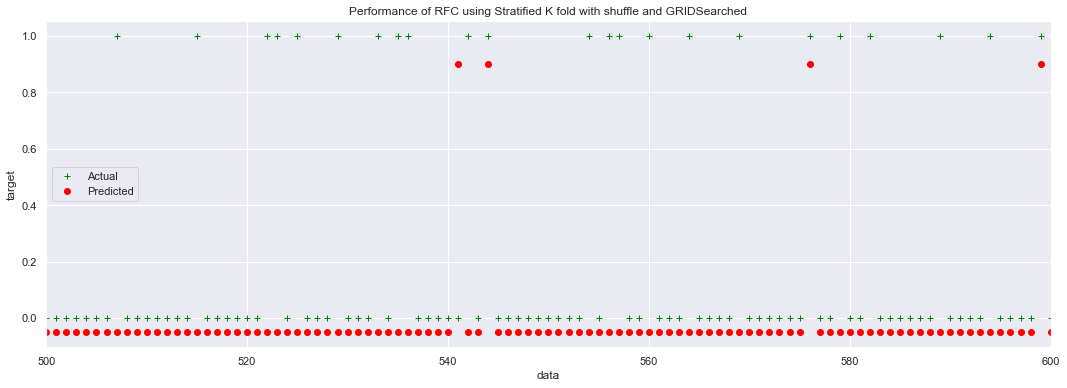

In [114]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), c="green",marker="+", linestyle='None', label="Actual")
plt.plot(y_pred_test_gs*0.95-0.05, c="red",marker="o",linestyle='None', label="Predicted")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Performance of RFC using Stratified K fold with shuffle and GRIDSearched")

plt.xlim(500,600)
plt.legend()
plt.show()

Takeaway: This is where you can really see that RFC is having trouble predicting the actual values. The hit rate for this is really bad. But this is expected as we only relied on a few features instead of using all.

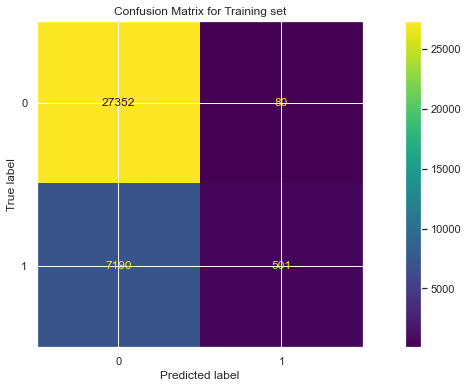

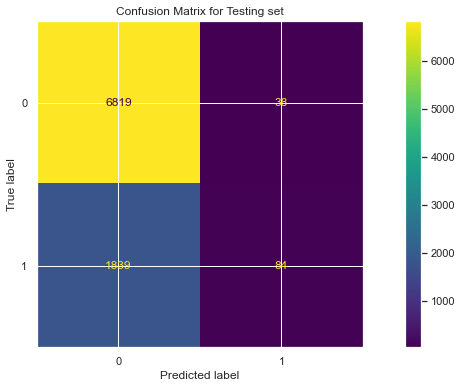

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#y_test is the true label
#calculate the confusion matrix, named it cm
cm_train_no_rfc_mc = confusion_matrix(y_train, y_pred_train_gs, labels=gs_pl_rfc.classes_)
cm_test_no_rfc_mc = confusion_matrix(y_test, y_pred_test_gs, labels=gs_pl_rfc.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train_no_rfc_mc,display_labels=gs_pl_rfc.classes_)
disp1.plot()
plt.title('Confusion Matrix for Training set')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_no_rfc_mc,display_labels=gs_pl_rfc.classes_)
disp2.plot()
plt.title('Confusion Matrix for Testing set')
plt.show()

Take-aways:
You can see that, the training set had SO MANY TP and TN. But when looking at the testing set, the performance just goes downhill, the model was struggling to differentiate between the TP and TN, in which in the process, gave us A LOT of FN and FP.

1. Model had trouble differentiating between the TP and TN, as such, this cause the multiple count of FP and FN.
2. Remember when the RFC model had an accuracy of near 0.99 with all features? It is inaccurate when it comes to imbalanced dataset, as such, we have to use MCC
3. There's no feature engineering as of now, so probably the score is a little low, who knows.
4. MCC is a more accurate score when it comes to imbalanced dataset

#### Using the voting classifier

In [116]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('rfc', gs_pl_rfc.best_estimator_), ('dtc', dtc_model)],\
                     weights=[8,2]) #specify the weights to the model

y_ensemble_testscore = vc.fit(X_train,y_train).predict(X_test)
y_ensemble_trainscore = vc.fit(X_train,y_train).predict(X_train)

printTrainScores(y_train,y_ensemble_trainscore)
print()
printTestScores(y_test,y_ensemble_testscore)

Precision for training set is 0.8270769870718389
Recall for training set is 0.5311123859268382
F1 score for training set is 0.501912135082042
MCC for training set is 0.20175376526416086

Precision for testing set is 0.738059938879611
Recall for testing set is 0.5190699825747149
F1 score for testing set is 0.48058594608734984
MCC for testing set is 0.13475605939878021


Takeaway: Nothing changed, score still the same as RFC best estimator's scoring. This is because our model is already bad, having the voting makes this whole thing useless.

### Interpret & Communicate
<a id='access-model-quality'></a>
#### Access model quality with Shap + Feature Engineering

In [117]:
param_grid_rfr = {'n_estimators': [5, 10, 50],'max_depth': np.arange(3, 10)}
model_rf_final= GridSearchCV(RandomForestClassifier(random_state=randomstate,n_jobs=-1),
                    param_grid = param_grid_rfr,
                    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate),
                    n_jobs=-1)

#build the model
model_rf_final_best=model_rf_final.fit(X_train, y_train)
print(model_rf_final_best.best_params_)

{'max_depth': 9, 'n_estimators': 50}


In [118]:
y_pred_train_gs_xx = model_rf_final_best.best_estimator_.predict(X_train)
y_pred_test_gs_xx = model_rf_final_best.best_estimator_.predict(X_test)

printTrainScores(y_train,y_pred_train_gs_xx)
print()
printTestScores(y_test,y_pred_test_gs_xx)

Precision for training set is 0.8509834360783479
Recall for training set is 0.5491307776842331
F1 score for training set is 0.5343871463164603
MCC for training set is 0.262633502575841

Precision for testing set is 0.699008133206547
Recall for testing set is 0.5238710554693151
F1 score for testing set is 0.4922294652760175
MCC for testing set is 0.13784823809709498


#### Explaining predictions made on the test set

In [119]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model_rf_final_best.best_estimator_)
shap_values = explainer.shap_values(X_test)

Visualising what it is like to be charged off, thus shap values is 1. I want to see how it is to be charged off

SHAP values for classes 0 and 1 are symmetrical. Why? Because if a feature contributes a certain amount towards class 1, it at the same time reduces the probability of being class 0 by the same amount. So in general for a binary classification, looking at shap_values[1] maybe just enough.

##### For Class 0: Those that fully pays off
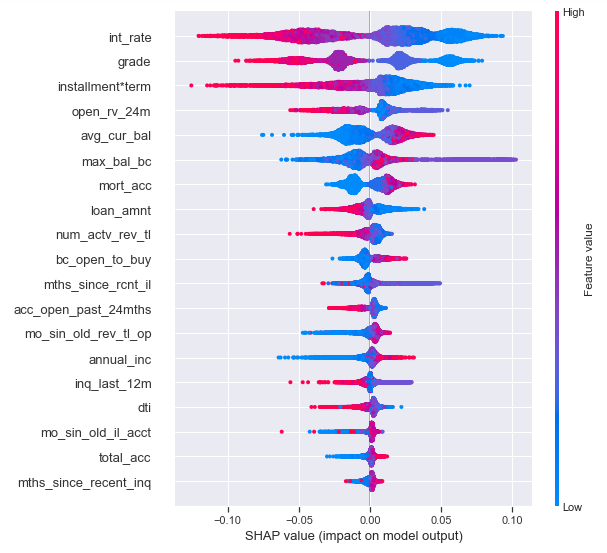

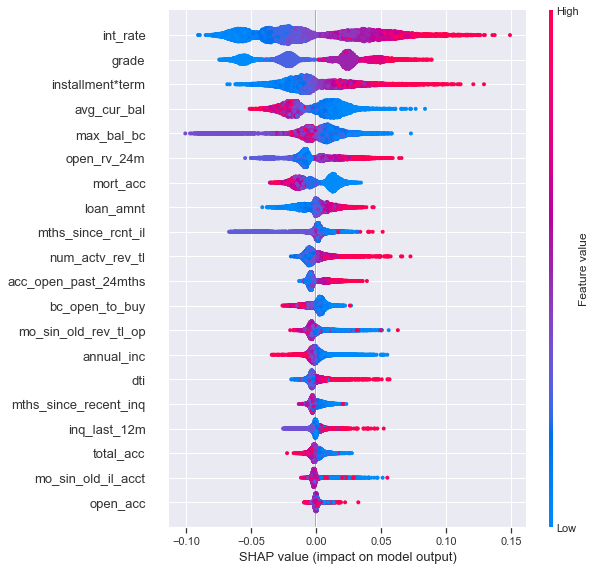

In [120]:
shap.summary_plot(shap_values[1], features=X_test, feature_names=X_test.columns)

<u>Some Takeaways from graph:</u>

The higher the grade, the more likely you are to be charged off. This make sense, Grade G (highest) has the highest default rate.

The higher the interest rate, the more likely you are to be charged off, make sense too.

Higher the installment rate, the more likely you are to be charged off.

Higher the dti, the more likely you are to be charged off.

### Cycle 1 of Feature Engineering

From domain knowledge, I would like to find out the demographics of those that called to inquire. For eg. I want to know more about their DTI, how many accounts were open in the past 24 months when they called at that point in time.

In [122]:
df_scoped_1=X_test.groupby(
    ['inq_last_12m']).agg(
{
    'dti':["mean", sum, min, "count"],
    'acc_open_past_24mths':["mean", sum, min, "count"]
    }
)
df_scoped_1

dti                  acc_open_past_24mths        \
                           mean    sum min count                 mean   sum   
inq_last_12m                                                                  
0             18.03006833712984  39576   0  2195   3.1184510250569475  6845   
1            17.885816692268307  34931   0  1953    4.111623143881208  8030   
2            18.557208825038483  36168   0  1949   4.5618265777321705  8891   
3            18.889795918367348  18512   0   980    5.577551020408163  5466   
4             19.15434083601286  11914   1   622    5.980707395498392  3720   
5            18.784461152882205   7495   1   399   6.5739348370927315  2623   
6             18.91902834008097   4673   0   247    6.765182186234818  1671   
7             20.98611111111111   3022   1   144    7.069444444444445  1018   
8             18.46511627906977   1588   4    86    7.116279069767442   612   
9              24.6984126984127   1556   2    63    8.015873015873016   505   
10           19.863636363636363    874   0    44   7.7272727272727275   340   
11           19.307692307692307    502   5    26    7.230769230769231   188   
12            25.26923076923077    657   7    26    8.192307692307692   213   
13           21.416666666666668    257   9    12                 7.25    87   
14           20.076923076923077    261   8    13     8.23076923076923   107   
15                         22.8    114   8     5                 10.6    53   
16                         20.0     60  15     3    5.333333333333333    16   
17                          8.5     17   5     2                  6.5    13   
18                         38.4    192  19     5                  7.2    36   
19                         15.0     45  11     3    5.333333333333333    16   
20                         25.0     25  25     1                  9.0     9   
23                         25.0     25  25     1                  7.0     7   
30                         23.0     23  23     1                 10.0    10   

                        
             min count  
inq_last_12m            
0              0  2195  
1              0  1953  
2              0  1949  
3              0   980  
4              0   622  
5              1   399  
6              0   247  
7              1   144  
8              1    86  
9              2    63  
10             1    44  
11             2    26  
12             2    26  
13             2    12  
14             5    13  
15             4     5  
16             2     3  
17             4     2  
18             3     5  
19             3     3  
20             9     1  
23             7     1  
30            10     1

#### Data Dictionary

- inq_last_12m:	Number of credit inquiries in past 12 months
- acc_open_past_24mths:	Number of trades opened in past 24 months.

In [123]:
bins = [-1,4,8,12,16,20,24,28,32,36]
labels = [1,2,3,4,5,6,7,8,9]
#Create a new feature inquires binned
X_train['inq_last_12m_B'] = pd.cut(X_train['inq_last_12m'], bins=bins, labels=labels).astype('int')
X_test['inq_last_12m_B'] = pd.cut(X_test['inq_last_12m'], bins=bins, labels=labels).astype('int')

In [124]:
df_scoped_1_1=X_test.groupby(
    ['inq_last_12m_B']).agg(
{
    'acc_open_past_24mths':["mean", sum, min, "count"],
    'dti':["mean", sum, min, "count"]
    }
)
df_scoped_1_1

acc_open_past_24mths                                 dti  \
                               mean    sum min count               mean   
inq_last_12m_B                                                            
1                 4.280036368359527  32952   0  7699  18.32718534874659   
2                 6.762557077625571   5924   0   876 19.152968036529682   
3                 7.836477987421383   1246   1   159 22.572327044025158   
4                  7.96969696969697    263   2    33  20.96969696969697   
5                6.7272727272727275     74   3    11 25.363636363636363   
6                               7.0      7   7     1               25.0   
8                              10.0     10  10     1               23.0   

                                  
                   sum min count  
inq_last_12m_B                    
1               141101   0  7699  
2                16778   0   876  
3                 3589   0   159  
4                  692   8    33  
5                  279   5    11  
6                   25  25     1  
8                   23  23     1

In [125]:
#making a flag for those that opened an account in the past 24mths
X_train['acc_open_past_24mths_Flag'] = X_train['acc_open_past_24mths'].apply(lambda x: 0 if x ==0 else 1)
X_test['acc_open_past_24mths_Flag'] = X_test['acc_open_past_24mths'].apply(lambda x: 0 if x ==0 else 1)

From what I can see here, people with high DTI (Debt to Income ratio) have more inquires over the past 12 months, moreover, those with high DTI also has a higher number of trades opened in the past 24 months.

According to online definiton, acc_open_past_24mths means: Open trades on your credit report refer to types of accounts you carry. These include loan agreements you’ve entered into and credit accounts extended to you by banks and financial institutions. These can mean that revolving account (credit card), installment account, charge account, collection account.

In [126]:
#build the model

param_grid_rfr = {'n_estimators': [5, 10, 50],'max_depth': np.arange(3, 10)}
model_rf_final_c1 = GridSearchCV(RandomForestClassifier(random_state=randomstate,n_jobs=-1),
                    param_grid = param_grid_rfr,
                    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate),
                    n_jobs=-1)
#build the model
model_rf_final_best_c1=model_rf_final_c1.fit(X_train, y_train)
print(model_rf_final_best_c1.best_params_)

{'max_depth': 9, 'n_estimators': 50}


In [127]:
y_pred_train_cycle_1 = model_rf_final_best_c1.best_estimator_.predict(X_train)
y_pred_test_cycle_1 = model_rf_final_best_c1.best_estimator_.predict(X_test)

print("With Feature Engineering")
printTrainScores(y_train,y_pred_train_cycle_1)
print()
printTestScores(y_test,y_pred_test_cycle_1)

With Feature Engineering
Precision for training set is 0.8482735541404453
Recall for training set is 0.5447179226578172
F1 score for training set is 0.5265752315953273
MCC for training set is 0.24959222630374944

Precision for testing set is 0.721741603133264
Recall for testing set is 0.5234776840395476
F1 score for testing set is 0.4903223656938746
MCC for testing set is 0.14430494512365882


#### Without Feature Engineering Results:
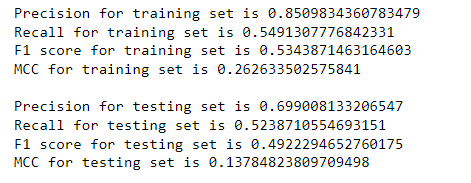

All of the scores(Precision,Recall,F1,MCC) went up, this is good news. It means that the features we introduced was a little impactful in the model.

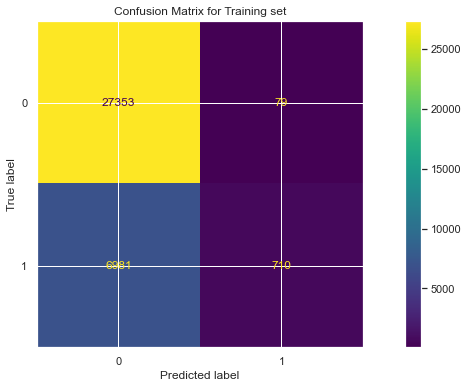

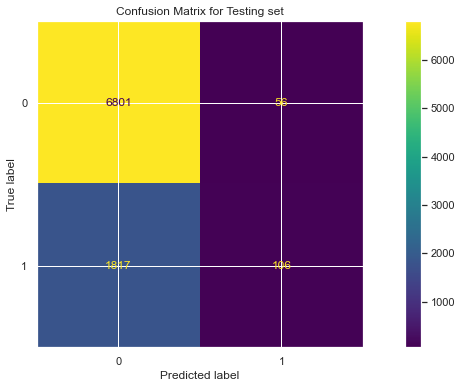

In [128]:
cm_train_fe_1 = confusion_matrix(y_train, y_pred_train_cycle_1, labels=model_rf_final_best_c1.best_estimator_.classes_)
cm_test_fe_1 = confusion_matrix(y_test, y_pred_test_cycle_1, labels=model_rf_final_best_c1.best_estimator_.classes_)
#diplay the matrix
disp1_fe_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_fe_1,display_labels=model_rf_final_best_c1.best_estimator_.classes_)
disp1_fe_train.plot()
plt.title('Confusion Matrix for Training set')
disp1_fe_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_fe_1,display_labels=model_rf_final_best_c1.best_estimator_.classes_)
disp1_fe_test.plot()
plt.title('Confusion Matrix for Testing set')
plt.show()

In [129]:
shap.initjs()
explainer1 = shap.TreeExplainer(model_rf_final_best_c1.best_estimator_)
shap_values1 = explainer1.shap_values(X_test)

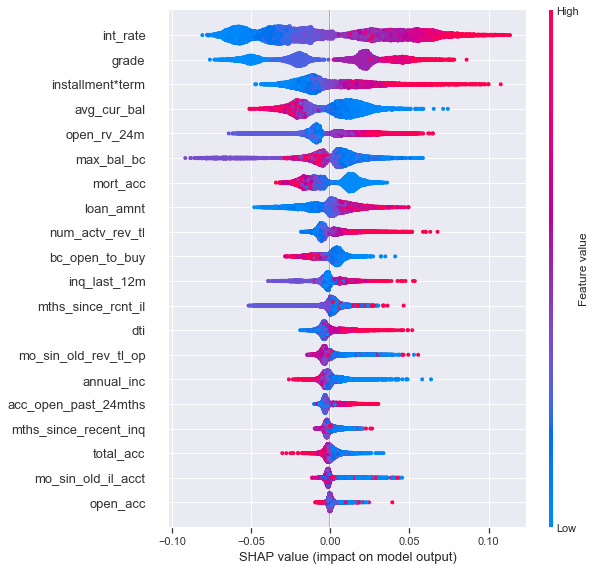

In [130]:
shap.summary_plot(shap_values1[1], features=X_test, feature_names=X_test.columns)

The features we newly engineered have a small impact on the model. Nevertheless, it still increase our scores.

In [131]:
shap.force_plot(explainer1.expected_value[1], shap_values1[1][3], X_test.iloc[3,:])

We can see that max_bal_bc is the one that causes our model performance to decrease, same goes for open_rv_24m. Though we know from the above summary plot that int_rate and grade are supposed to be the top factor, it still lost to max_bal_bc and open_rv_24m (being pushed left)

### Cycle 2 of Feature Engineering

Judging from previous model performance using SHAP

In [132]:
import shap
shap.initjs() 
explainer2 = shap.TreeExplainer(model_rf_final_best_c1.best_estimator_)
shap_values2 = explainer2.shap_values(X_test)

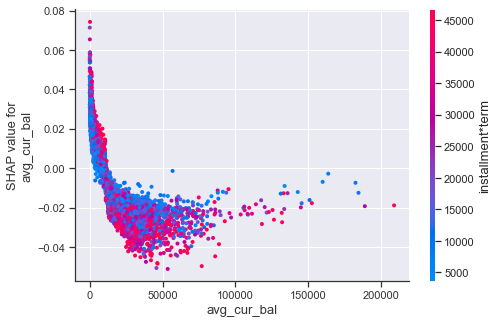

In [133]:
shap.dependence_plot("avg_cur_bal", shap_values2[1], X_test,x_jitter=0.1)

In [134]:
shap.force_plot(explainer2.expected_value[1], shap_values2[1][3], X_test.iloc[3,:])

- f(x) is the model predict_proba value: 0.08 (means how likely are you to default as explained by expected_value[1])
- Base value started at 0.2192
- Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

Int Rate and Grade are the 2 factors that are pushing the prediction up, but max_bal_bc and open_rv_24m and mths_since_rcnt_il are pushing it down.

Based on domain knowledge, we shall engineer a new feature by ourself

#### Data Dictionary:

- avg_cur_bal: Average current balance of all accounts
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- grade:	LC assigned loan grade


In [135]:
#will round off to 3dp for simplicity
X_train['acbOloanamnt'] = round((X_train['avg_cur_bal'] / X_train['loan_amnt']),3)
X_test['acbOloanamnt'] = round((X_test['avg_cur_bal'] / X_test['loan_amnt']),3)

In [136]:
#just want to see if there's any interaction
X_train['acbOloanamntXgrade'] = X_train['acbOloanamnt']*X_train['grade']
X_test['acbOloanamntXgrade'] = X_test['acbOloanamnt']*X_test['grade']

In [137]:
param_grid_rfr = {'n_estimators': [5, 10, 50],'max_depth': np.arange(3, 10)}
model_rf_final_c2 = GridSearchCV(RandomForestClassifier(random_state=randomstate,n_jobs=-1),
                    param_grid = param_grid_rfr,
                    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate),
                    n_jobs=-1)
#build the model
model_rf_final_best_c2=model_rf_final_c2.fit(X_train, y_train)
print(model_rf_final_best_c2.best_params_)

{'max_depth': 9, 'n_estimators': 50}


In [138]:
y_pred_train_cycle_2 = model_rf_final_best_c2.best_estimator_.predict(X_train)
y_pred_test_cycle_2 = model_rf_final_best_c2.best_estimator_.predict(X_test)

print("With Feature Engineering")
printTrainScores(y_train,y_pred_train_cycle_2)
print()
printTestScores(y_test,y_pred_test_cycle_2)

With Feature Engineering
Precision for training set is 0.8556442120054866
Recall for training set is 0.54419296647155
F1 score for training set is 0.5254535136505636
MCC for training set is 0.2507347023206746

Precision for testing set is 0.6914024764438337
Recall for testing set is 0.5197742137481911
F1 score for testing set is 0.48402323012136017
MCC for testing set is 0.12304200065235438


In [139]:
shap.initjs() 
explainer2_1 = shap.TreeExplainer(model_rf_final_best_c2.best_estimator_)
shap_values2_1 = explainer2_1.shap_values(X_test)

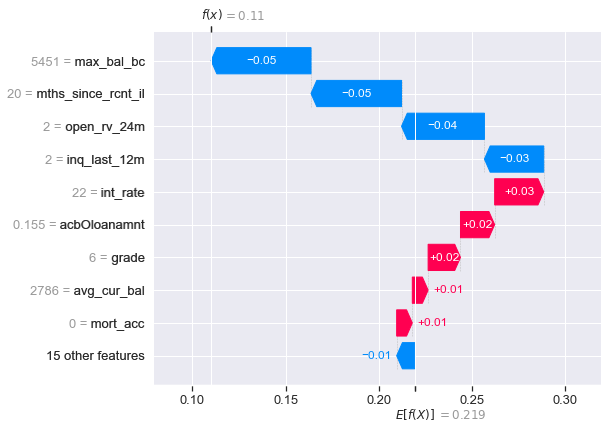

In [141]:
row = 2
shap.waterfall_plot(shap.Explanation(values=shap_values2_1[1][row], 
                                              base_values=explainer2_1.expected_value[1], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

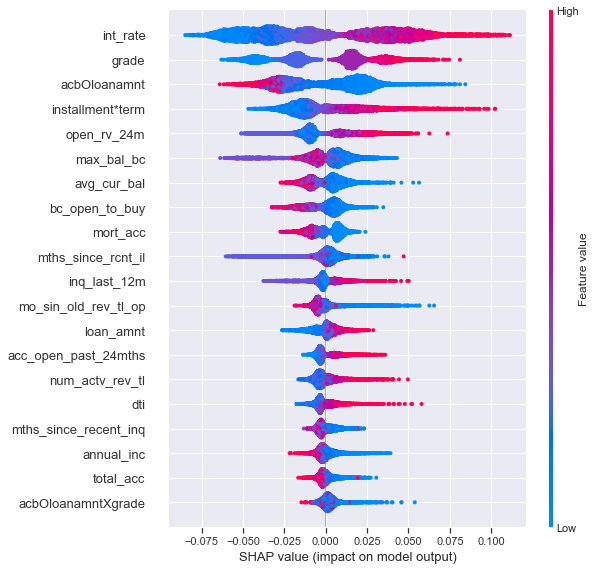

In [142]:
shap.summary_plot(shap_values2_1[1], features=X_test, feature_names=X_test.columns)

In Cycle 2, we can see that the new features we engineered did have an impact on the model (+0.02), and did a better job than the original predictor of annual_cur_bal and loan_amnt

### Cycle 3 of Feature Engineering

In [143]:
df_scoped_3=X_test.groupby(
    ['grade']).agg(
{
    'max_bal_bc':["mean", sum, min, "count"],
    'num_actv_rev_tl':["mean", sum, min, "count"]
    }
)
df_scoped_3

max_bal_bc                       num_actv_rev_tl             \
                    mean       sum min count              mean    sum min   
grade                                                                       
1      5662.640914709518   9162153   0  1618 4.640914709517923   7509   0   
2      5360.278023302531  13341732   0  2489 5.212936922458819  12975   0   
3      5283.267724867725  14978064   0  2835 5.402469135802469  15316   0   
4     5107.8045178105995   5879083   0  1151 5.717636837532581   6581   0   
5      5336.473333333333   2401413   0   450 6.195555555555556   2788   0   
6      5539.493055555556    797687   0   144 6.506944444444445    937   0   
7      5850.537634408603    544100   0    93 6.763440860215054    629   1   

             
      count  
grade        
1      1618  
2      2489  
3      2835  
4      1151  
5       450  
6       144  
7        93

#### Data Dictionary:

- max_bal_bc:	Maximum current balance owed on all revolving accounts
- num_actv_rev_tl:	Number of currently active revolving trades


In [144]:
X_train['mbbXnart'] = X_train['max_bal_bc']/X_train['num_actv_rev_tl']
X_train['mbbOnart'] = X_train['max_bal_bc']*X_train['num_actv_rev_tl']

X_test['mbbXnart'] = X_test['max_bal_bc']/X_test['num_actv_rev_tl']
X_test['mbbOnart'] = X_test['max_bal_bc']*X_test['num_actv_rev_tl']

In [145]:
#fillna with 0 for now
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [146]:
#replace inf value with 0
X_train['mbbXnart'] = X_train['mbbXnart'].replace([np.inf, -np.inf], 0)
X_train['mbbOnart'] = X_train['mbbOnart'].replace([np.inf, -np.inf], 0)

X_test['mbbXnart'] = X_test['mbbXnart'].replace([np.inf, -np.inf], 0)
X_test['mbbOnart'] = X_test['mbbOnart'].replace([np.inf, -np.inf], 0)

In [147]:
showMissing(X_test)
showMissing(X_train)#no results given means no missing value

In [148]:
param_grid_rfr = {'n_estimators': [5, 10, 50],'max_depth': np.arange(3, 10)}
model_rf_final_c3 = GridSearchCV(RandomForestClassifier(random_state=randomstate,n_jobs=-1),
                    param_grid = param_grid_rfr,
                    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate),
                    n_jobs=-1)
#build the model
model_rf_final_best_c3=model_rf_final_c3.fit(X_train, y_train)
print(model_rf_final_best_c3.best_params_)

{'max_depth': 8, 'n_estimators': 50}


In [149]:
y_pred_train_cycle_3 = model_rf_final_best_c3.best_estimator_.predict(X_train)
y_pred_test_cycle_3 = model_rf_final_best_c3.best_estimator_.predict(X_test)

print("With Feature Engineering")
printTrainScores(y_train,y_pred_train_cycle_3)
print()
printTestScores(y_test,y_pred_test_cycle_3)

With Feature Engineering
Precision for training set is 0.8220856112022807
Recall for training set is 0.5362191069055084
F1 score for training set is 0.5116734628626487
MCC for training set is 0.216015306724884

Precision for testing set is 0.7257364580432571
Recall for testing set is 0.5231764177961022
F1 score for testing set is 0.48953488372093024
MCC for testing set is 0.14466184657224357


In [150]:
import shap
shap.initjs() 
explainer3_1 = shap.TreeExplainer(model_rf_final_best_c3.best_estimator_)
shap_values3_1 = explainer3_1.shap_values(X_test)

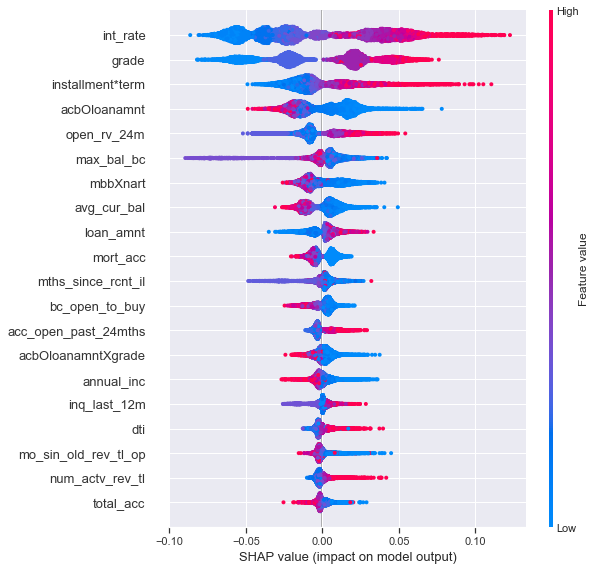

In [151]:
shap.summary_plot(shap_values3_1[1], features=X_test, feature_names=X_test.columns)

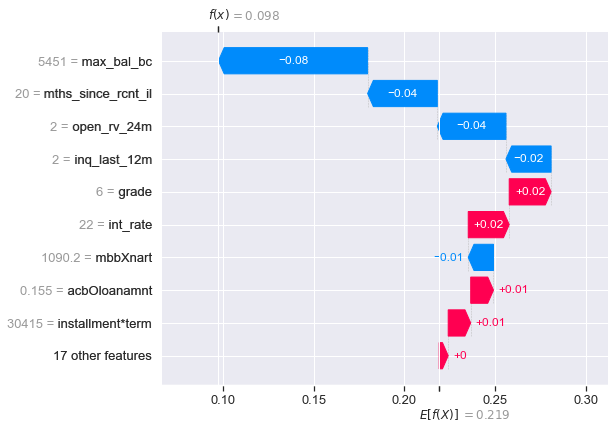

In [152]:
row = 2
shap.waterfall_plot(shap.Explanation(values=shap_values3_1[1][row], 
                                              base_values=explainer3_1.expected_value[1], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

The new feature we came out with did not really help out much.

### Cycle 4 of Feature Engineering

This is the ratio between open credit lines in the borrower’s file and the total number of credit lines ever opened in the borrower’s file. (open_acc / total_acc)

In [153]:
df_scoped_4=X_test.groupby(
    ['grade']).agg(
{
    'total_acc':["mean", sum, min, "count"],
    'open_acc':["mean", sum, min, "count"],
    }
)
df_scoped_4

total_acc                            open_acc                 
                    mean    sum min count               mean    sum min count
grade                                                                        
1     24.971569839307787  40404   2  1618 11.907911001236094  19267   1  1618
2      22.83487344314986  56836   2  2489  11.18722378465247  27845   0  2489
3      22.30440917107584  63233   2  2835 11.104761904761904  31482   1  2835
4     22.670721112076457  26094   2  1151 11.465682015638576  13197   1  1151
5     22.655555555555555  10195   2   450 11.835555555555555   5326   1   450
6     24.229166666666668   3489   3   144               12.0   1728   3   144
7     24.806451612903224   2307   3    93  12.64516129032258   1176   1    93

#### Data Dictionary

- total_acc: The total number of credit lines currently in the borrower's credit file
- open_acc: The number of open credit lines in the borrower's credit file.

In [154]:
#round off to 3dp for simplicity
X_train['totalAccOopenAcc'] = round((X_train['total_acc']/X_train['open_acc']),3)
X_train['totalAccXopenAcc'] = round((X_train['total_acc']*X_train['open_acc']),3)

X_test['totalAccOopenAcc'] = round((X_test['total_acc']/X_test['open_acc']),3)
X_test['totalAccXopenAcc'] = round((X_test['total_acc']*X_test['open_acc']),3)

In [155]:
#have some with inf value, replacing with 0 instead
X_train['totalAccOopenAcc'] = X_train['totalAccOopenAcc'].replace([np.inf, -np.inf], 0)
X_train['totalAccXopenAcc'] = X_train['totalAccXopenAcc'].replace([np.inf, -np.inf], 0)

X_test['totalAccOopenAcc'] = X_test['totalAccOopenAcc'].replace([np.inf, -np.inf], 0)
X_test['totalAccXopenAcc'] = X_test['totalAccXopenAcc'].replace([np.inf, -np.inf], 0)

In [156]:
param_grid_rfr = {'n_estimators': [5, 10, 50],'max_depth': np.arange(3, 10)}
model_rf_final_c4 = GridSearchCV(RandomForestClassifier(random_state=randomstate,n_jobs=-1),
                    param_grid = param_grid_rfr,
                    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=randomstate),
                    n_jobs=-1)
#build the model
model_rf_final_best_c4=model_rf_final_c4.fit(X_train, y_train)
print(model_rf_final_best_c4.best_params_)

{'max_depth': 8, 'n_estimators': 10}


In [157]:
y_pred_train_cycle_4 = model_rf_final_best_c4.best_estimator_.predict(X_train)
y_pred_test_cycle_4 = model_rf_final_best_c4.best_estimator_.predict(X_test)

print("With Feature Engineering")
printTrainScores(y_train,y_pred_train_cycle_4)
print()
printTestScores(y_test,y_pred_test_cycle_4)

With Feature Engineering
Precision for training set is 0.7867800920273886
Recall for training set is 0.5416855523867171
F1 score for training set is 0.5228403359504409
MCC for training set is 0.21867406384548896

Precision for testing set is 0.7048072876362699
Recall for testing set is 0.5286020920200961
F1 score for testing set is 0.5015151535370547
MCC for testing set is 0.15307405903495064


##### Comparision of score (Model with No feature engineering done)
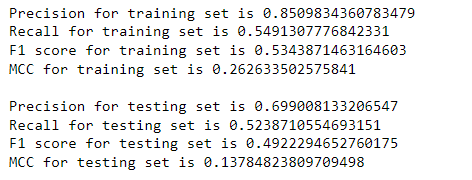

Overall, we see a 0.02 increase in MCC score for the test set. As such, Precision,Recall and F1 score have also improved after we did feature engineering.

In [158]:
import shap
shap.initjs() 
explainer4_1 = shap.TreeExplainer(model_rf_final_best_c4.best_estimator_)
shap_values4_1 = explainer4_1.shap_values(X_test)

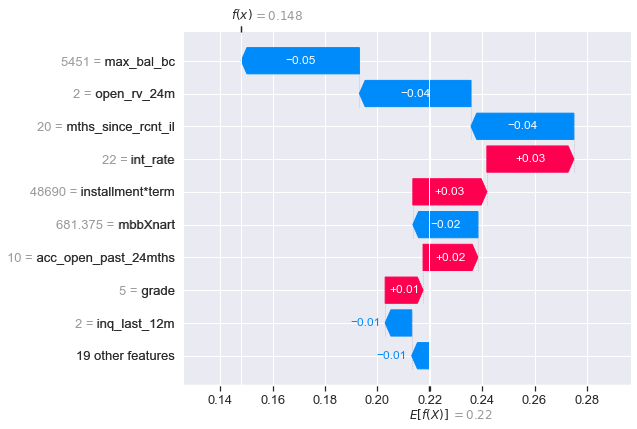

In [173]:
row = 32
shap.waterfall_plot(shap.Explanation(values=shap_values4_1[1][row], 
                                              base_values=explainer4_1.expected_value[1], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

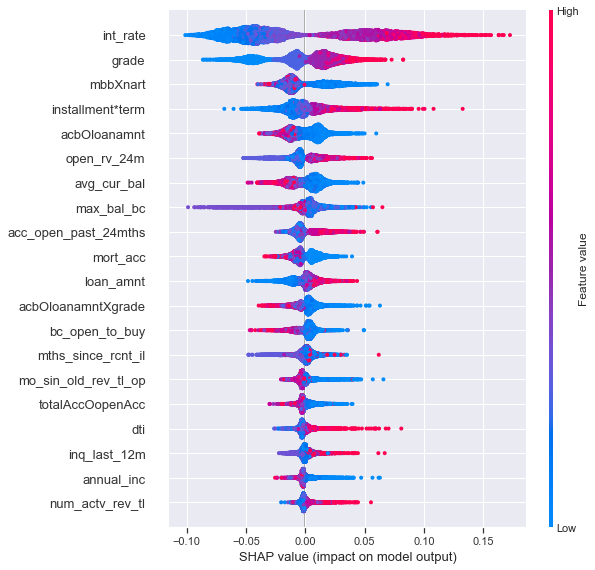

In [160]:
shap.summary_plot(shap_values4_1[1], features=X_test, feature_names=X_test.columns)

Our new feature of totalAccOopenAcc were stronger predictor than totalAcc and openAcc

#### Confusion Matrix for final cycle

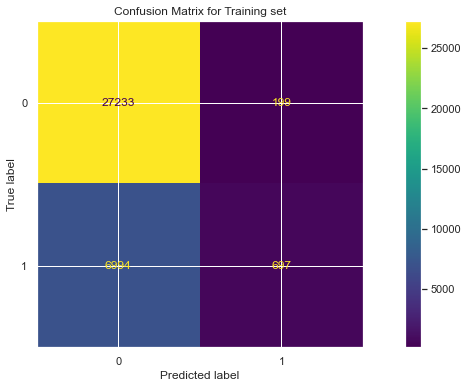

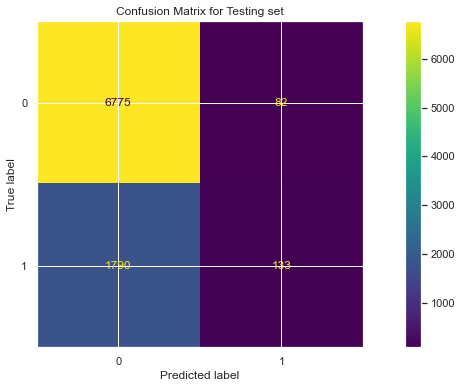

In [161]:
cm_train_fe_4 = confusion_matrix(y_train, y_pred_train_cycle_4, labels=model_rf_final_best_c4.best_estimator_.classes_)
cm_test_fe_4 = confusion_matrix(y_test, y_pred_test_cycle_4, labels=model_rf_final_best_c4.best_estimator_.classes_)
#diplay the matrix
disp4_fe_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_fe_4,display_labels=model_rf_final_best_c4.best_estimator_.classes_)
disp4_fe_train.plot()
plt.title('Confusion Matrix for Training set')
disp4_fe_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_fe_4,display_labels=model_rf_final_best_c4.best_estimator_.classes_)
disp4_fe_test.plot()
plt.title('Confusion Matrix for Testing set')
plt.show()

In [162]:
my_df=pd.concat((pd.Series(X_test.columns), pd.Series(shap_values4_1[1][2])), axis=1)
my_df=my_df.rename(columns={0:"Feature", 1:"SHAP value"})
my_df=my_df.sort_values('SHAP value', ascending=False)
my_df[:10]

Feature            SHAP value
0             int_rate   0.03023546168398376
2                grade  0.025090734643969898
1     installment*term  0.009510598878594366
22        acbOloanamnt  0.008194644272052028
6             mort_acc  0.007509899798736633
7       bc_open_to_buy  0.004956851773693042
3          avg_cur_bal 0.0033556525227984332
23  acbOloanamntXgrade 0.0029474419683926056
4            loan_amnt 0.0016476379974894406
27    totalAccXopenAcc 0.0013609454510308673

We can see that some of the features we have engineered(acbOloanamnt,acbOloanamntXgrade,totalAccXopenAcc) did have an impact on the model itself.

<a id='explain-model-performance'></a>
## 4.2 Explanation of Model Performance
#### Learning Curve

If you want, you can run the command below, if not you can refer to the chart (result) down below

In [ ]:
#!pip install mlxtend

([0.07801822323462415,
  0.14137243735763097,
  0.16657175398633256,
  0.17382020072603033,
  0.1875747394795285,
  0.19090779670668628,
  0.1975107784918246,
  0.20076162004413126,
  0.2031319202783929,
  0.20479457905076445],
 [0.2214123006833713,
  0.21765375854214122,
  0.21708428246013667,
  0.2165148063781321,
  0.21685649202733484,
  0.21628701594533029,
  0.21366742596810934,
  0.21457858769931662,
  0.21594533029612756,
  0.21321184510250568])

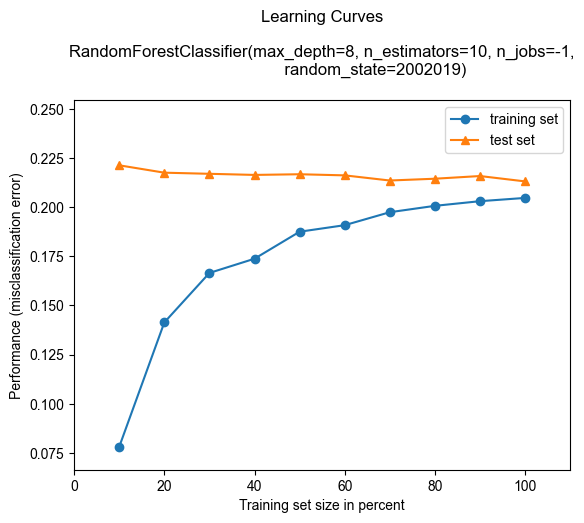

In [163]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, model_rf_final_best_c4.best_estimator_)

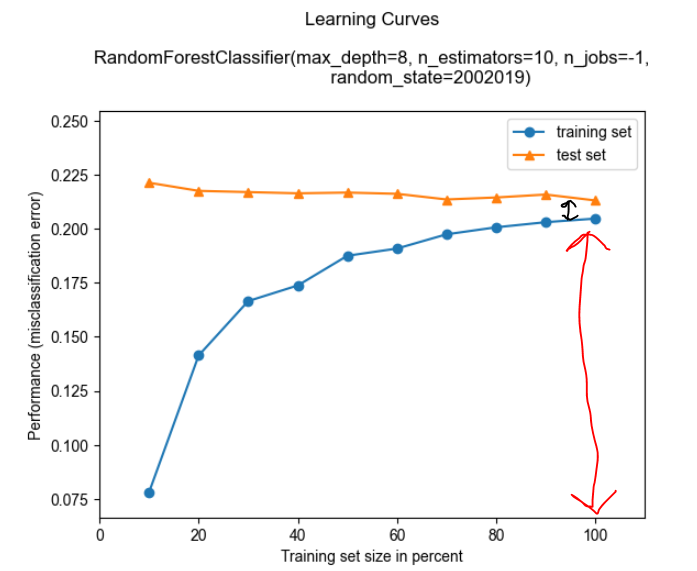

Interpretation from Learning Curve: As the training set size increase, the training set's misclassification error tends to go up, but also, when the training set size increase, the test set misclassification error goes down a little. As you can see at the end of the line, there is a small gap(black drawing) between the training set and test set, suggesting that it is a low variance.

The training error is high (red drawing), it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.

#### PR Curve

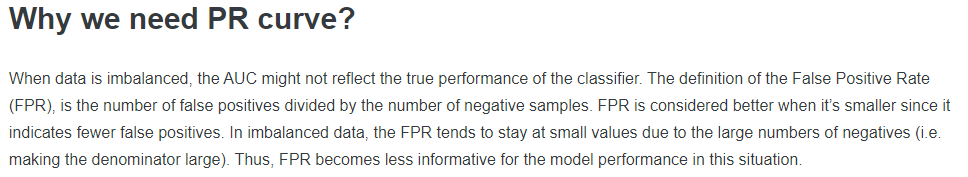

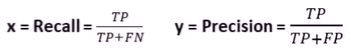

#### Precision 

- It is a metric that quantifies the number of correct positive predictions made.

- It is calculated as the number of true positives divided by the total number of true positives and false positives.

- Precision = TruePositives / (TruePositives + FalsePositives)
- The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.

#### Recall 
- It is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

- It is calculated as the number of true positives divided by the total number of true positives and false negatives (e.g. it is the true positive rate).

- Recall = TruePositives / (TruePositives + FalseNegatives)
- The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.

A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. For a balanced dataset this will be 0.5.

The focus of the PR curve on the minority class makes it an effective diagnostic for imbalanced binary classification models.

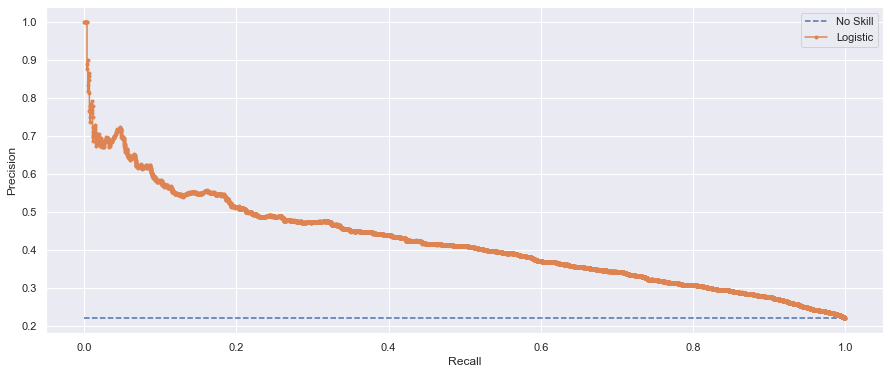

In [164]:
from sklearn.metrics import precision_recall_curve

yhat = model_rf_final_best_c4.best_estimator_.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

What I can interprate from this plot. If you want a high precision, recall value would be 0. And vice-versa, if you want high recall, the precision would only be 0.2. As such, it depends on which value you would like to prioritise. I want to prioritise both, in which I would be using F1 score instead, which is the harmonic mean between the Precision and Recall.

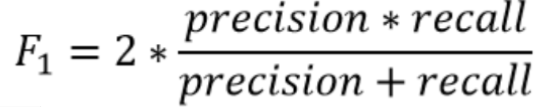

In this case, our F1 score is around 0.5.
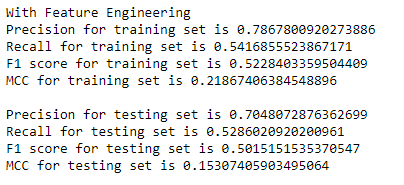

#### Hit Rate of the Random Forest Classifier (Final)

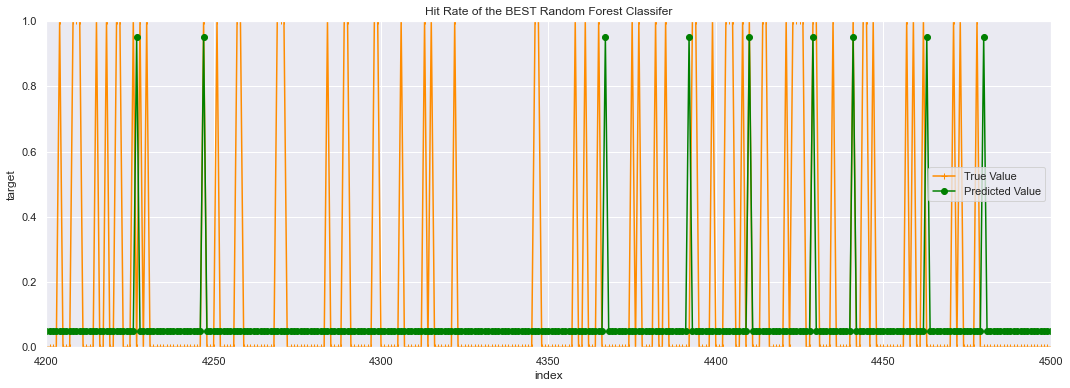

In [165]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), c="darkorange",marker="+", label="True Value")
#purposely set the offset to see both markers at the same index
plt.plot(y_pred_test_cycle_4*0.9+0.05, c="green",marker="o", label="Predicted Value")

plt.xlabel("index")
plt.ylabel("target")
plt.ylim(0,1)
plt.xlim(4200,4500)
plt.title("Hit Rate of the BEST Random Forest Classifer")

plt.legend()
plt.show()

<a id='conclusion'></a>
#### Conclusion

In conclusion, although our model is not that good to predict the charged off rate, we can access them based on these criteria, which our TPEZM also covered.

- interest rate 
- annual inc
- installment * term 
- grade
- monthlyincome / loan amnt
- mort acc
- avg current balance
- inq last 12m
- dti
- totalacc/openacc
- loan amnt
- acc open past 24mths
- acboloanamnt
- mbbXNart (max_bal_bc * num_actv_rev_tl)
#### do look through my report to see the summary! the picture below is just a rough sketch
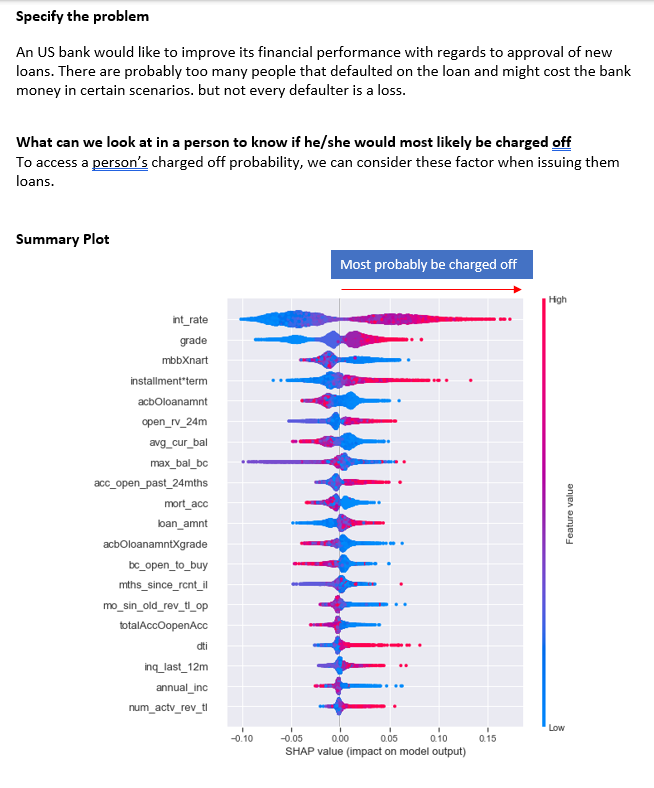

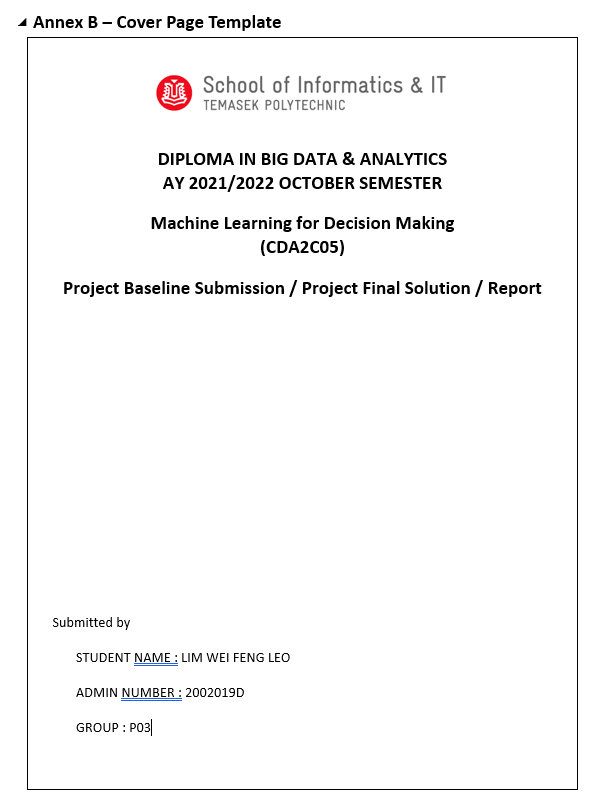

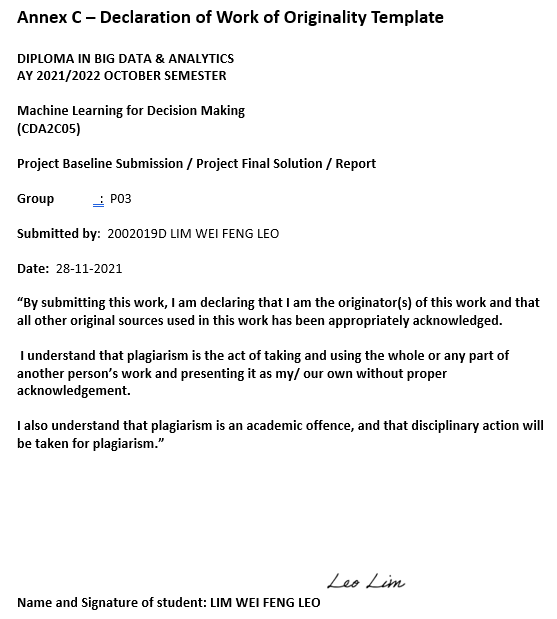